<a href="https://colab.research.google.com/github/patrickanaku/MCS-7103-Machine-Learning/blob/main/Assignment2_MachineLearningModelDevelopment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PREDICTING FATALITIES FROM VIOLENT ORGANIZED CRIMES IN AFRICA USING ML REGRESSION MODELING TECHNIQUES**

The raw dataset was collected from ACLED website, this dataset is a collection reported information on the type, agents, location, date, and other characteristics of political violence events, demonstration events, and other select non-violent, politically relevant developments in every country and territory in the world. Below is a link to the dataset and explantion of the features in the dataset respectivily.

https://data.world/acled/71d852e4-e41e-4320-a770-9fc2bb87fb64


# **Prepare Environment**

Connect to Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Install and Import Necessary Libraries

In [ ]:
!pip install plotly
!pip install geopandas
!pip install alluvial
!pip install wordcloud
!pip install circlify
!pip install category_encoders

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import geopandas as gpd

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from category_encoders import TargetEncoder
import seaborn as sns
import matplotlib.pyplot as plt


from wordcloud import WordCloud, STOPWORDS
import circlify

from tabulate import tabulate

ERROR: Could not find a version that satisfies the requirement alluvial (from versions: none)
ERROR: No matching distribution found for alluvial


In [ ]:
acled_data = pd.read_csv('/content/drive/MyDrive/MCSC1/dataset/Africa_1997-2024_Oct11.csv')

# **View Basic Information**



Quick view at the features and datatypes

In [ ]:
acled_data.shape

(389425, 31)

In [ ]:
# Lists all column names
acled_data.columns

Index(['event_id_cnty', 'event_date', 'year', 'time_precision',
       'disorder_type', 'event_type', 'sub_event_type', 'actor1',
       'assoc_actor_1', 'inter1', 'actor2', 'assoc_actor_2', 'inter2',
       'interaction', 'civilian_targeting', 'iso', 'region', 'country',
       'admin1', 'admin2', 'admin3', 'location', 'latitude', 'longitude',
       'geo_precision', 'source', 'source_scale', 'notes', 'fatalities',
       'tags', 'timestamp'],
      dtype='object')

In [ ]:
# A view of all non-null counts and data types for each column
acled_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 389425 entries, 0 to 389424
Data columns (total 31 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   event_id_cnty       389425 non-null  object 
 1   event_date          389425 non-null  object 
 2   year                389425 non-null  int64  
 3   time_precision      389425 non-null  int64  
 4   disorder_type       389425 non-null  object 
 5   event_type          389425 non-null  object 
 6   sub_event_type      389425 non-null  object 
 7   actor1              389425 non-null  object 
 8   assoc_actor_1       105548 non-null  object 
 9   inter1              389425 non-null  object 
 10  actor2              283227 non-null  object 
 11  assoc_actor_2       77497 non-null   object 
 12  inter2              283227 non-null  object 
 13  interaction         389425 non-null  object 
 14  civilian_targeting  115535 non-null  object 
 15  iso                 389425 non-nul

In [ ]:
# Displays the first 5 rows
acled_data.head()

event_id_cnty  event_date  year  time_precision           disorder_type  \
0      MLI33140  2024-10-04  2024               1      Political violence   
1      BFO12659  2024-10-04  2024               1      Political violence   
2      BFO12661  2024-10-04  2024               1      Political violence   
3      BFO12665  2024-10-04  2024               1      Political violence   
4      BFO12682  2024-10-04  2024               1  Strategic developments   

                   event_type    sub_event_type  \
0  Explosions/Remote violence  Air/drone strike   
1  Explosions/Remote violence  Air/drone strike   
2                     Battles       Armed clash   
3                     Battles       Armed clash   
4      Strategic developments             Other   

                                         actor1 assoc_actor_1        inter1  \
0               Military Forces of Mali (2021-)           NaN  State forces   
1       Military Forces of Burkina Faso (2022-)           NaN  State forces   
2  JNIM: Group for Support of Islam and Muslims           NaN   Rebel group   
3  JNIM: Group for Support of Islam and Muslims           NaN   Rebel group   
4  JNIM: Group for Support of Islam and Muslims           NaN   Rebel group   

   ...     location latitude longitude geo_precision  \
0  ...        Zakak  19.5878    2.8908             1   
1  ...  Dida Forest  10.0116   -4.0287             2   
2  ...        Djibo  14.0875   -1.6418             2   
3  ...       Aorema  13.6758   -2.3336             1   
4  ...        Piela  12.7097   -0.1311             2   

                                  source         source_scale  \
0  FAMAMali; Twitter; Undisclosed Source  Local partner-Other   
1                     Undisclosed Source  Local partner-Other   
2                   Al Zallaqa; Whatsapp            New media   
3                               Whatsapp            New media   
4                     Undisclosed Source  Local partner-Other   

                                               notes fatalities tags  \
0  On 4 October 2024, the Malian air force carrie...          7  NaN   
1  On 4 October 2024, the Burkinabe force carried...          5  NaN   
2  On 4 October 2024, JNIM militants carried out ...          0  NaN   
3  On 4 October 2024, JNIM militants attacked a p...          0  NaN   
4  Non-violent activity: On 4 October 2024, JNIM ...          0  NaN   

    timestamp  
0  1728335020  
1  1728358478  
2  1728358478  
3  1728358478  
4  1728358478  

[5 rows x 31 columns]

In [ ]:
# Displays the last 5 rows
acled_data.tail()

event_id_cnty  event_date  year  time_precision  \
389420          SIE6  1997-01-01  1997               3   
389421          SIE7  1997-01-01  1997               3   
389422          ANG2  1997-01-01  1997               3   
389423          SIE8  1997-01-01  1997               3   
389424          CEN1  1997-01-01  1997               1   

                 disorder_type                  event_type  \
389420      Political violence  Violence against civilians   
389421      Political violence                     Battles   
389422      Political violence  Violence against civilians   
389423  Strategic developments      Strategic developments   
389424      Political violence                     Battles   

                          sub_event_type  \
389420                            Attack   
389421                       Armed clash   
389422                            Attack   
389423  Headquarters or base established   
389424                       Armed clash   

                                                   actor1  \
389420        Military Forces of Sierra Leone (1996-1997)   
389421                                    Kamajor Militia   
389422  UNITA: National Union for the Total Independen...   
389423        Military Forces of Sierra Leone (1996-1997)   
389424  Military Forces of the Central African Republi...   

                                            assoc_actor_1             inter1  \
389420                                                NaN       State forces   
389421                                                NaN  Political militia   
389422                                                NaN        Rebel group   
389423                                                NaN       State forces   
389424  Mutiny of Military Forces of the Central Afric...       State forces   

        ...     location latitude longitude geo_precision  \
389420  ...  York Island   7.5317  -12.4694             2   
389421  ...      Fakunya   8.2310  -12.3380             2   
389422  ...        Cuito -12.3833   16.9333             3   
389423  ...       Taiama   8.2013  -12.0600             2   
389424  ...       Bangui   4.3612   18.5549             1   

                                  source             source_scale  \
389420  No Peace Without Justice; SL-LED  Local partner-New media   
389421  SL-LED; No Peace Without Justice  Local partner-New media   
389422       Diario de Noticias (Angola)                 National   
389423  No Peace Without Justice; SL-LED  Local partner-New media   
389424                        All Africa                 Regional   

                                                    notes fatalities tags  \
389420  Around 1 January 1997 (month of), Military For...          0  NaN   
389421  Around 1 January 1997 (month of), Kamajor Mili...          0  NaN   
389422  The total number of chiefs in the past 6 month...         10  NaN   
389423                                               base          0  NaN   
389424  4 deaths reported, denied by both sides, anti-...          2  NaN   

         timestamp  
389420  1670286851  
389421  1670286851  
389422  1673316822  
389423  1678830926  
389424  1714437981  

[5 rows x 31 columns]

In [ ]:
# Shows summary statistics for numerical columns
acled_data.describe()

year  time_precision            iso       latitude  \
count  389425.000000   389425.000000  389425.000000  389425.000000   
mean     2017.091941        1.131140     508.184269       6.887778   
std         6.598252        0.396304     251.626498      15.689057   
min      1997.000000        1.000000      12.000000     -34.706800   
25%      2014.000000        1.000000     231.000000       0.180900   
50%      2019.000000        1.000000     566.000000       6.537400   
75%      2022.000000        1.000000     710.000000      13.528800   
max      2024.000000        3.000000     894.000000      37.281500   

           longitude  geo_precision     fatalities     timestamp  
count  389425.000000  389425.000000  389425.000000  3.894250e+05  
mean       21.792419       1.276680       2.499706  1.665458e+09  
std        16.796154       0.494637      25.018580  4.838976e+07  
min       -25.163100       1.000000       0.000000  1.552576e+09  
25%         8.124200       1.000000       0.000000  1.621889e+09  
50%        27.899700       1.000000       0.000000  1.673291e+09  
75%        33.432600       2.000000       1.000000  1.711406e+09  
max        64.683200       3.000000    1350.000000  1.728422e+09

# **Extensive Exploratory Data Analysis**

View of Columns with Null Values

In [ ]:
from tabulate import tabulate

# Calculate the number of null values in each column
null_counts = acled_data.isnull().sum()

# Filter columns with null values and get their names
null_columns = null_counts[null_counts > 0].index.tolist()

# Filter columns without null values and get their names
non_null_columns = null_counts[null_counts == 0].index.tolist()

# Create DataFrame for columns with null values
null_data = pd.DataFrame({
    'Column': null_columns,
    'Null Count': [acled_data[col].isnull().sum() for col in null_columns]
})

# Print the number of columns without null values
print(f"\nNumber of columns without null values: {len(non_null_columns)}")

# Print the number of columns with null values
print(f"Number of columns with null values: {len(null_columns)}")

# Print null values table in a nice format
print(tabulate(null_data, headers='keys', tablefmt='grid'))


Number of columns without null values: 22
Number of columns with null values: 9
+----+--------------------+--------------+
|    | Column             |   Null Count |
+====+====================+==============+
|  0 | assoc_actor_1      |       283877 |
+----+--------------------+--------------+
|  1 | actor2             |       106198 |
+----+--------------------+--------------+
|  2 | assoc_actor_2      |       311928 |
+----+--------------------+--------------+
|  3 | inter2             |       106198 |
+----+--------------------+--------------+
|  4 | civilian_targeting |       273890 |
+----+--------------------+--------------+
|  5 | admin1             |           12 |
+----+--------------------+--------------+
|  6 | admin2             |         3621 |
+----+--------------------+--------------+
|  7 | admin3             |       194447 |
+----+--------------------+--------------+
|  8 | tags               |       301614 |
+----+--------------------+--------------+


Pie chart comparision of  missing values per column.

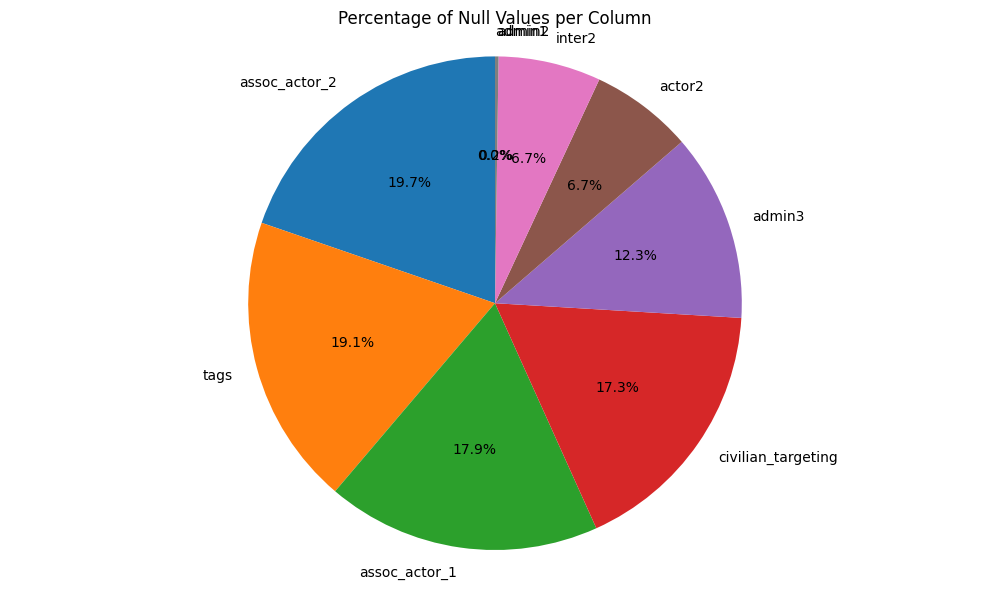

In [ ]:
# Calculate the percentage of null values for each column
null_percentages = (acled_data.isnull().sum() / len(acled_data)) * 100

# Filter out columns with no missing values
null_percentages = null_percentages[null_percentages > 0]

# Sort values in descending order (optional)
null_percentages = null_percentages.sort_values(ascending=False)

# Create the pie chart
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.pie(null_percentages, labels=null_percentages.index, autopct='%1.1f%%',
        startangle=90)
plt.title('Percentage of Null Values per Column')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show()

Percentage of Numerical and Categorical Features

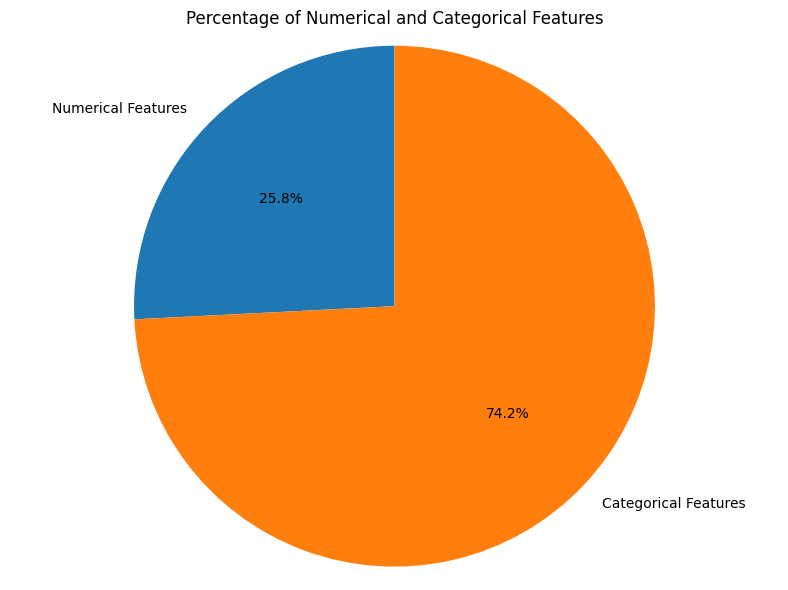

In [ ]:
# Select numerical features
numerical_features = acled_data.select_dtypes(include=['int64', 'float64']).columns

# Select categorical features
categorical_features = acled_data.select_dtypes(include=['object']).columns

# Calculate total number of features
total_features = len(acled_data.columns)

# Calculate percentage of numerical features
percentage_numerical = (len(numerical_features) / total_features) * 100

# Calculate percentage of categorical features
percentage_categorical = (len(categorical_features) / total_features) * 100


# Create labels and data for the pie chart
labels = ['Numerical Features', 'Categorical Features']
sizes = [percentage_numerical, percentage_categorical]

# Create the pie chart
plt.figure(figsize=(8, 6))  # Adjust figure size as needed
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Percentage of Numerical and Categorical Features')
plt.axis('equal')
plt.tight_layout()
plt.show()

**Checking for Outliers in the target Variable  (Fatalities)**

Using Box Plots

Should visualize outliers as individual isolated points beyond the whisker.

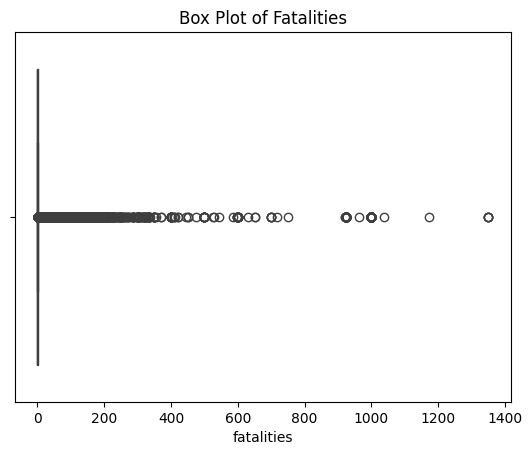

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=acled_data['fatalities'])  # Replace 'fatalities' with your column name
plt.title('Box Plot of Fatalities')
plt.show()

Using Scarter plots

Visualize points that deviate significantly off given pattern.

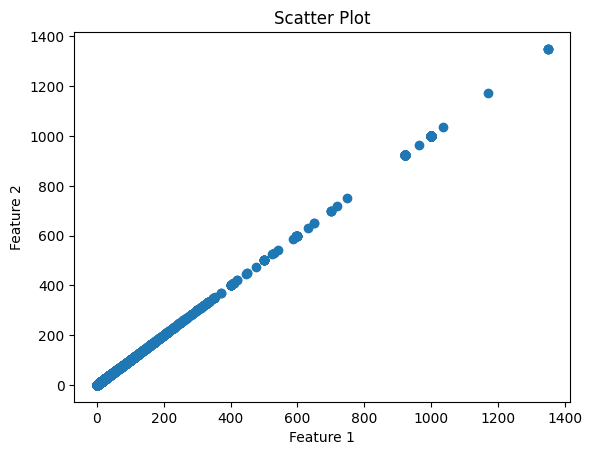

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(acled_data['fatalities'], acled_data['fatalities'])  # Replace with your feature columns
plt.title('Scatter Plot')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

Using Histograms

visualize isolated bars

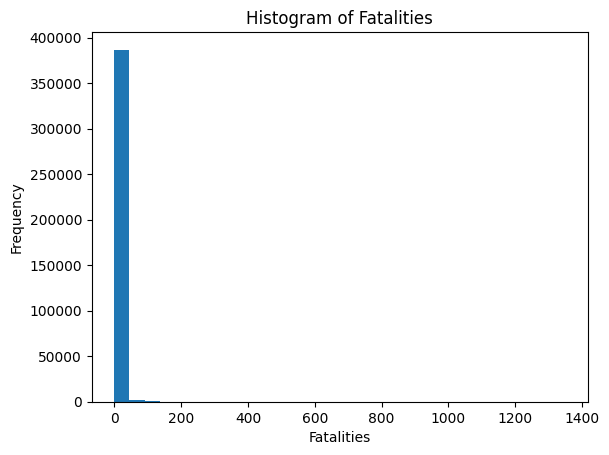

In [ ]:
import matplotlib.pyplot as plt

plt.hist(acled_data['fatalities'], bins=30)  # Replace 'fatalities' with your column name
plt.title('Histogram of Fatalities')
plt.xlabel('Fatalities')
plt.ylabel('Frequency')
plt.show()

Bar plot of Event Types ( 1997 -2024 )



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



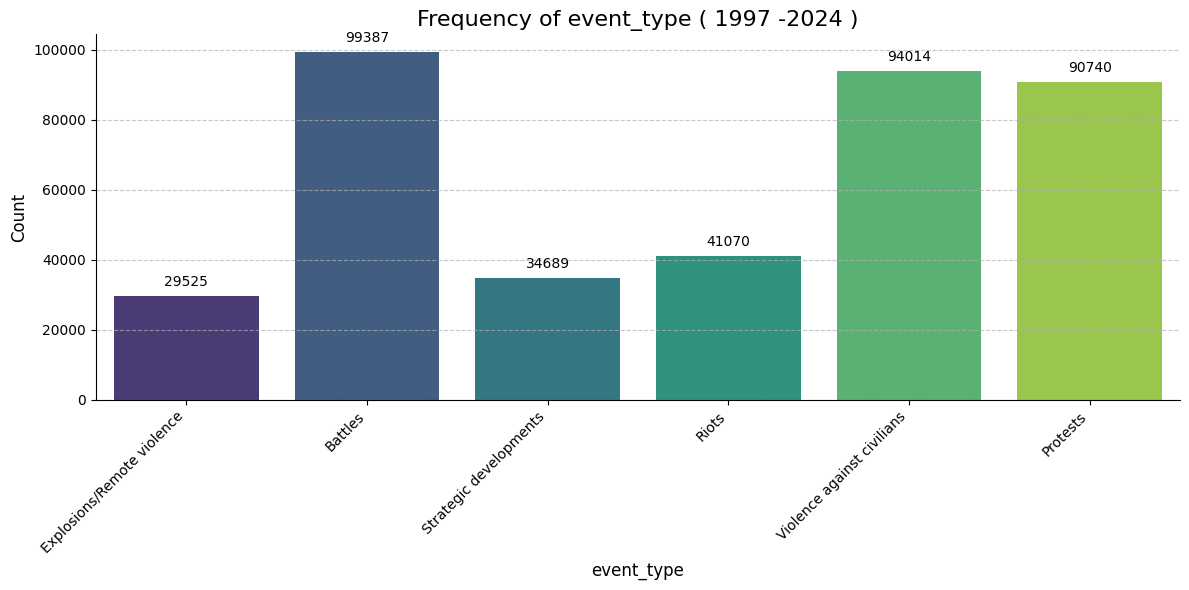

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

categorical_var = 'event_type'  # Replace with your categorical variable

plt.figure(figsize=(12, 6))
ax = sns.countplot(x=categorical_var, data=acled_data, palette="viridis")  # Use a color palette

plt.title(f'Frequency of {categorical_var} ( 1997 -2024 )', fontsize=16)  # Increase title font size
plt.xlabel(categorical_var, fontsize=12)  # Increase x-axis label font size
plt.ylabel('Count', fontsize=12)  # Increase y-axis label font size
plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotate and adjust x-axis ticks
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add a subtle grid
sns.despine()  # Remove top and right spines for a cleaner look

# Add value labels to the bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

plt.tight_layout()
plt.show()

Visualizing Missing Variable



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



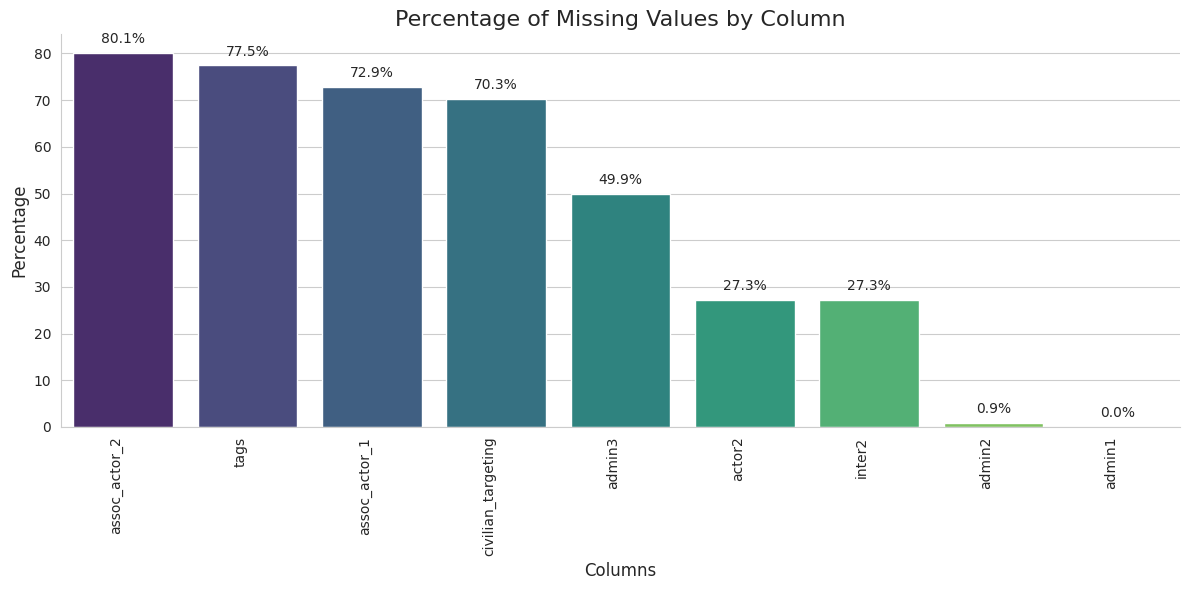

In [ ]:
def plot_missing_percentages(df):
    """Plots the percentage of missing values for each column in a DataFrame."""

    # Calculate percentage of missing values
    missing_percentages = (df.isnull().sum() / len(df)) * 100

    # Filter out columns with no missing values
    missing_percentages = missing_percentages[missing_percentages > 0]

    # Sort values in descending order
    missing_percentages = missing_percentages.sort_values(ascending=False)

    # Create the plot with seaborn styling
    plt.figure(figsize=(12, 6))
    sns.set_style("whitegrid")  # Set a background style
    ax = sns.barplot(x=missing_percentages.index, y=missing_percentages.values, palette="viridis")

    # Customize plot elements
    plt.title('Percentage of Missing Values by Column', fontsize=16)
    plt.xlabel('Columns', fontsize=12)
    plt.ylabel('Percentage', fontsize=12)
    plt.xticks(rotation=90, ha='right', fontsize=10)
    plt.tight_layout()

    # Add value labels to the bars
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.1f') + '%',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10)

    sns.despine()  # Remove top and right spines
    plt.show()

# Call the function with your DataFrame
plot_missing_percentages(acled_data)

Correlation Matrix - for Numerical Features

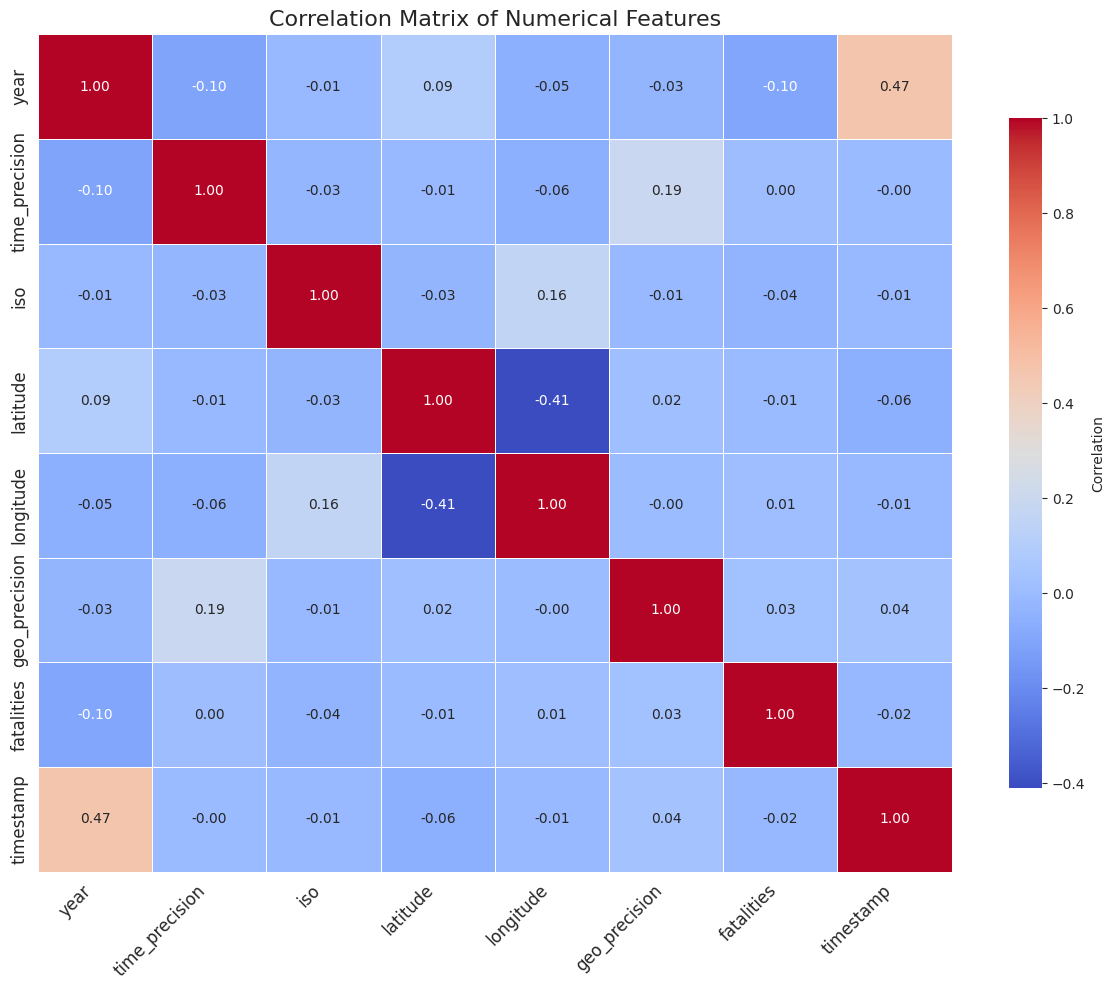

In [ ]:
# Calculate the correlation matrix for numerical features
correlation_matrix = acled_data.select_dtypes(include=['number']).corr()

# Create a heatmap with customization
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix,
            annot=True,  # Show correlation values on the heatmap
            cmap='coolwarm',  # Use a diverging colormap (e.g., 'coolwarm', 'RdBu_r')
            fmt=".2f",  # Format correlation values to two decimal places
            linewidths=.5,  # Add lines between cells for better readability
            cbar_kws={'shrink': .8, 'label': 'Correlation'})  # Adjust colorbar size and label

plt.title('Correlation Matrix of Numerical Features', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

**Temporal Analysis**

Since the data that has a time component, it is useful to know how the features have changed over time from 1997 to 2024.

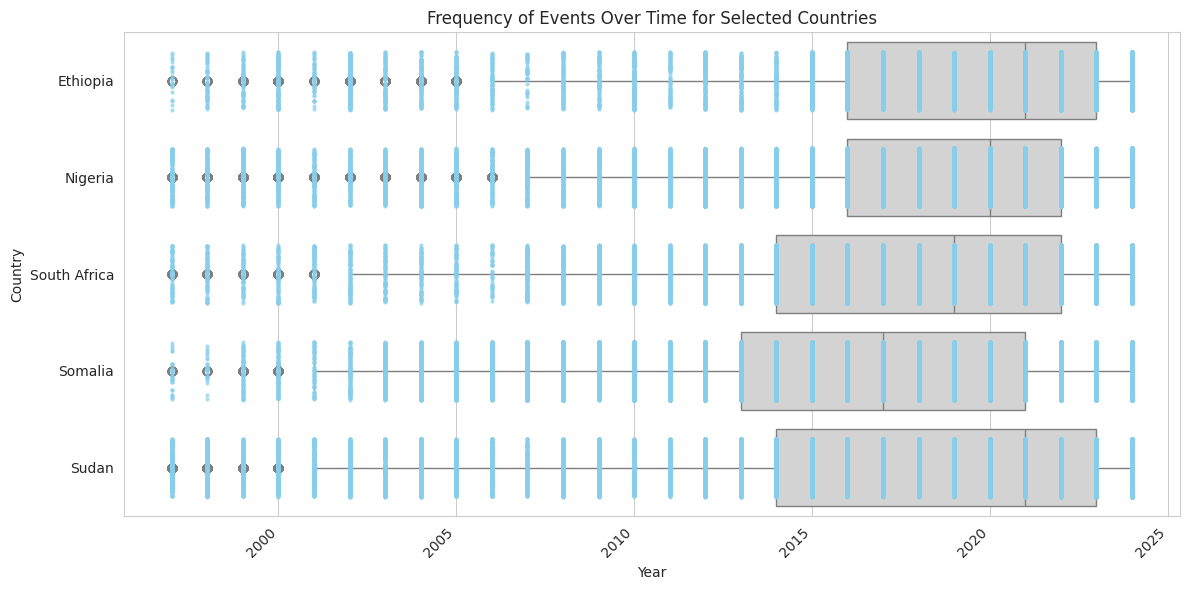

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'event_date' and 'country' are your columns
acled_data['event_date'] = pd.to_datetime(acled_data['event_date'])
acled_data['year'] = acled_data['event_date'].dt.year  # Extract year

# List of countries to focus on (replace with your desired countries)
countries_to_include = ['Nigeria', 'Somalia', 'South Africa', 'Sudan', 'Ethiopia']

# Filter the DataFrame
filtered_data = acled_data[acled_data['country'].isin(countries_to_include)]

plt.figure(figsize=(12, 6))  # Adjust figure size as needed

# Jittered plot for filtered countries
sns.stripplot(x='year', y='country', data=filtered_data, jitter=0.3, size=3, alpha=0.7, color='skyblue')

# Boxplot for filtered countries
sns.boxplot(x='year', y='country', data=filtered_data, color='lightgray', showfliers=True)  # showfliers=False to hide outliers

plt.title('Frequency of Events Over Time for Selected Countries')
plt.xlabel('Year')
plt.ylabel('Country')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Analysis By Feature type (Numerical and Categorical)**

First we extracted the two types of features into separate dataframes.

In [ ]:
# Select and extract numerical features
numerical_features = acled_data.select_dtypes(include=['int64', 'float64'])

# Print the first 5 rows of the numerical features in a pretty table
print(tabulate(numerical_features.head(), headers='keys', tablefmt='pretty'))

+---+----------------+-------+----------+-----------+---------------+------------+--------------+
|   | time_precision |  iso  | latitude | longitude | geo_precision | fatalities |  timestamp   |
+---+----------------+-------+----------+-----------+---------------+------------+--------------+
| 0 |      1.0       | 466.0 | 19.5878  |  2.8908   |      1.0      |    7.0     | 1728335020.0 |
| 1 |      1.0       | 854.0 | 10.0116  |  -4.0287  |      2.0      |    5.0     | 1728358478.0 |
| 2 |      1.0       | 854.0 | 14.0875  |  -1.6418  |      2.0      |    0.0     | 1728358478.0 |
| 3 |      1.0       | 854.0 | 13.6758  |  -2.3336  |      1.0      |    0.0     | 1728358478.0 |
| 4 |      1.0       | 854.0 | 12.7097  |  -0.1311  |      2.0      |    0.0     | 1728358478.0 |
+---+----------------+-------+----------+-----------+---------------+------------+--------------+


In [ ]:
# Select and extract categorical features
categorical_features = acled_data.select_dtypes(include=['object'])

# Display  features
# print("\nCategorical Features:")
print(tabulate(categorical_features.head(), headers='keys', tablefmt='pretty'))

+---+---------------+------------------------+----------------------------+------------------+----------------------------------------------+---------------+--------------+----------------------------------------------+----------------------------------------+------------------+------------------------------+--------------------+----------------+--------------+----------+----------+-------------+-------------+---------------------------------------+---------------------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+------+
|   | event_id_cnty |     disorder_type      |     

Visualizing Categorical Variables

A bar chart to visualize event types by country

Text(0, 0.5, 'Number of Events')

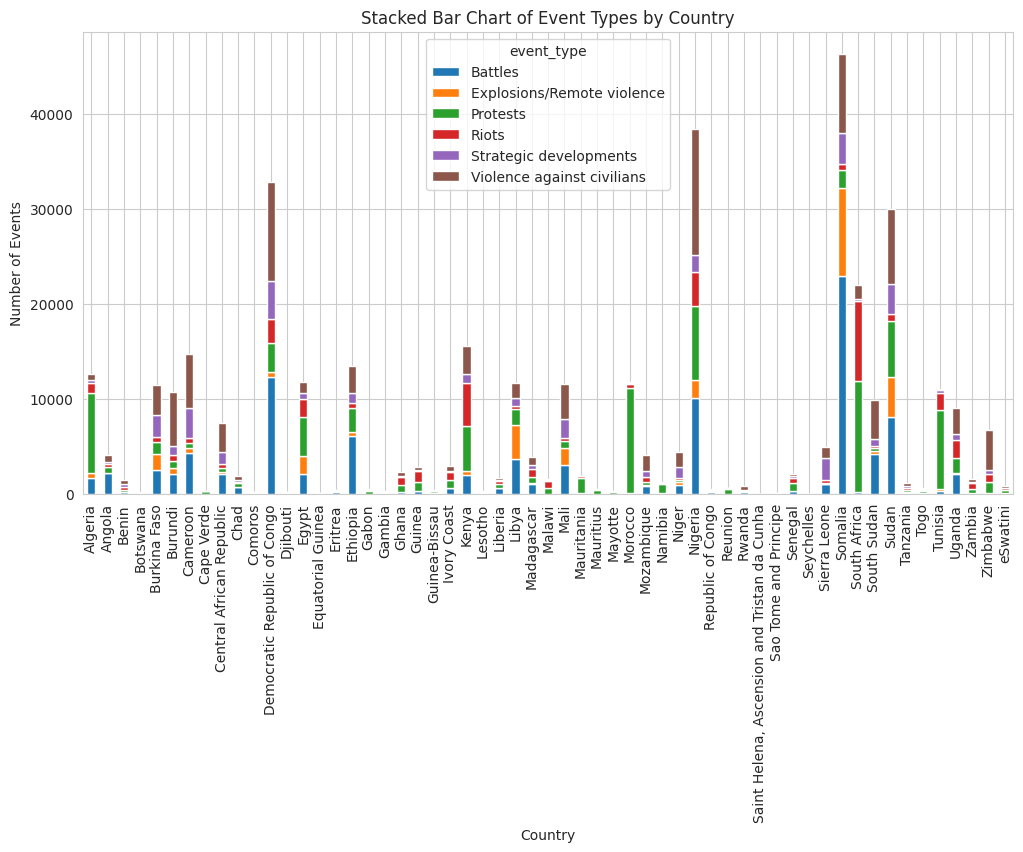

In [ ]:
# Stacked Bar Chart of Event Types by Country (Matplotlib)
# (Requires data manipulation to get counts of event types per country)
# Example (replace 'COUNTRY' with your actual country column):
event_counts = acled_data.groupby(['country', 'event_type'])['event_id_cnty'].count().unstack()
event_counts.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Stacked Bar Chart of Event Types by Country')
plt.xlabel('Country')
plt.ylabel('Number of Events')

Frequency of Event Subtypes (1997 - 2024)

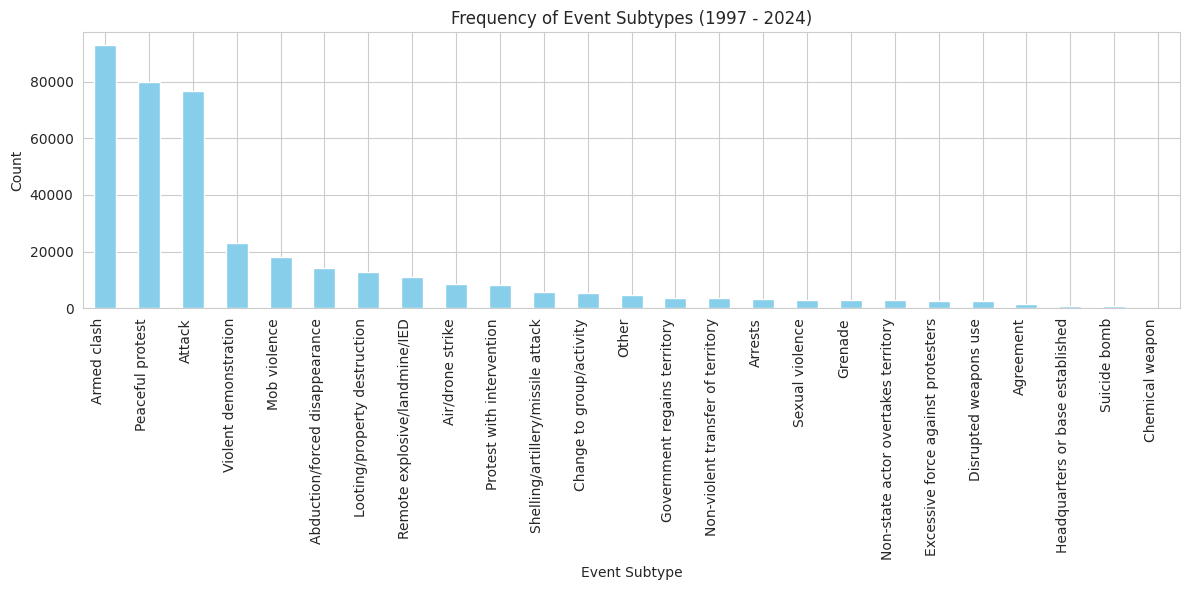

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))  # Adjust figure size as needed

# Get the value counts and sort them in descending order
# Removed extra spaces from column name 'SUB_EVENT_TYPE'
event_subtype_counts = acled_data['sub_event_type'].value_counts()

# Create the bar chart
event_subtype_counts.plot(kind='bar', color='skyblue')

plt.title('Frequency of Event Subtypes (1997 - 2024)')
plt.xlabel('Event Subtype')
plt.ylabel('Count')
plt.xticks(rotation=90, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

A pie chart to visualize event types by their percentage value.

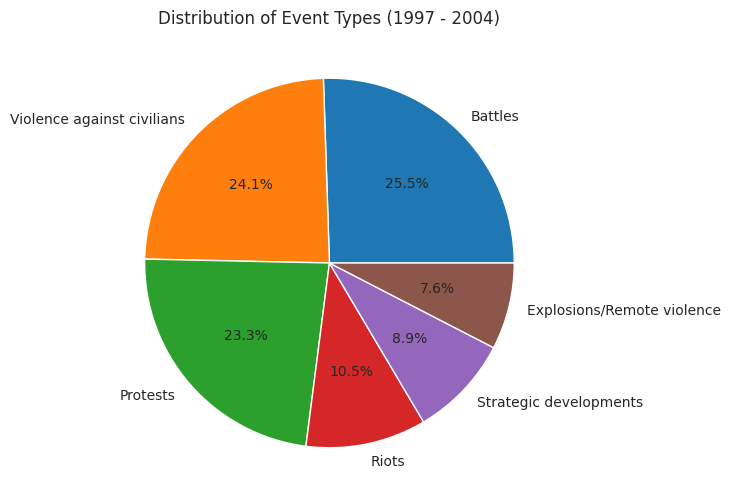

In [ ]:
plt.figure(figsize=(10, 6))
acled_data['event_type'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Event Types (1997 - 2004)')
plt.ylabel('')
plt.show()

Visualizing Numerical Variables

A box and whisker plot for each numerical features.

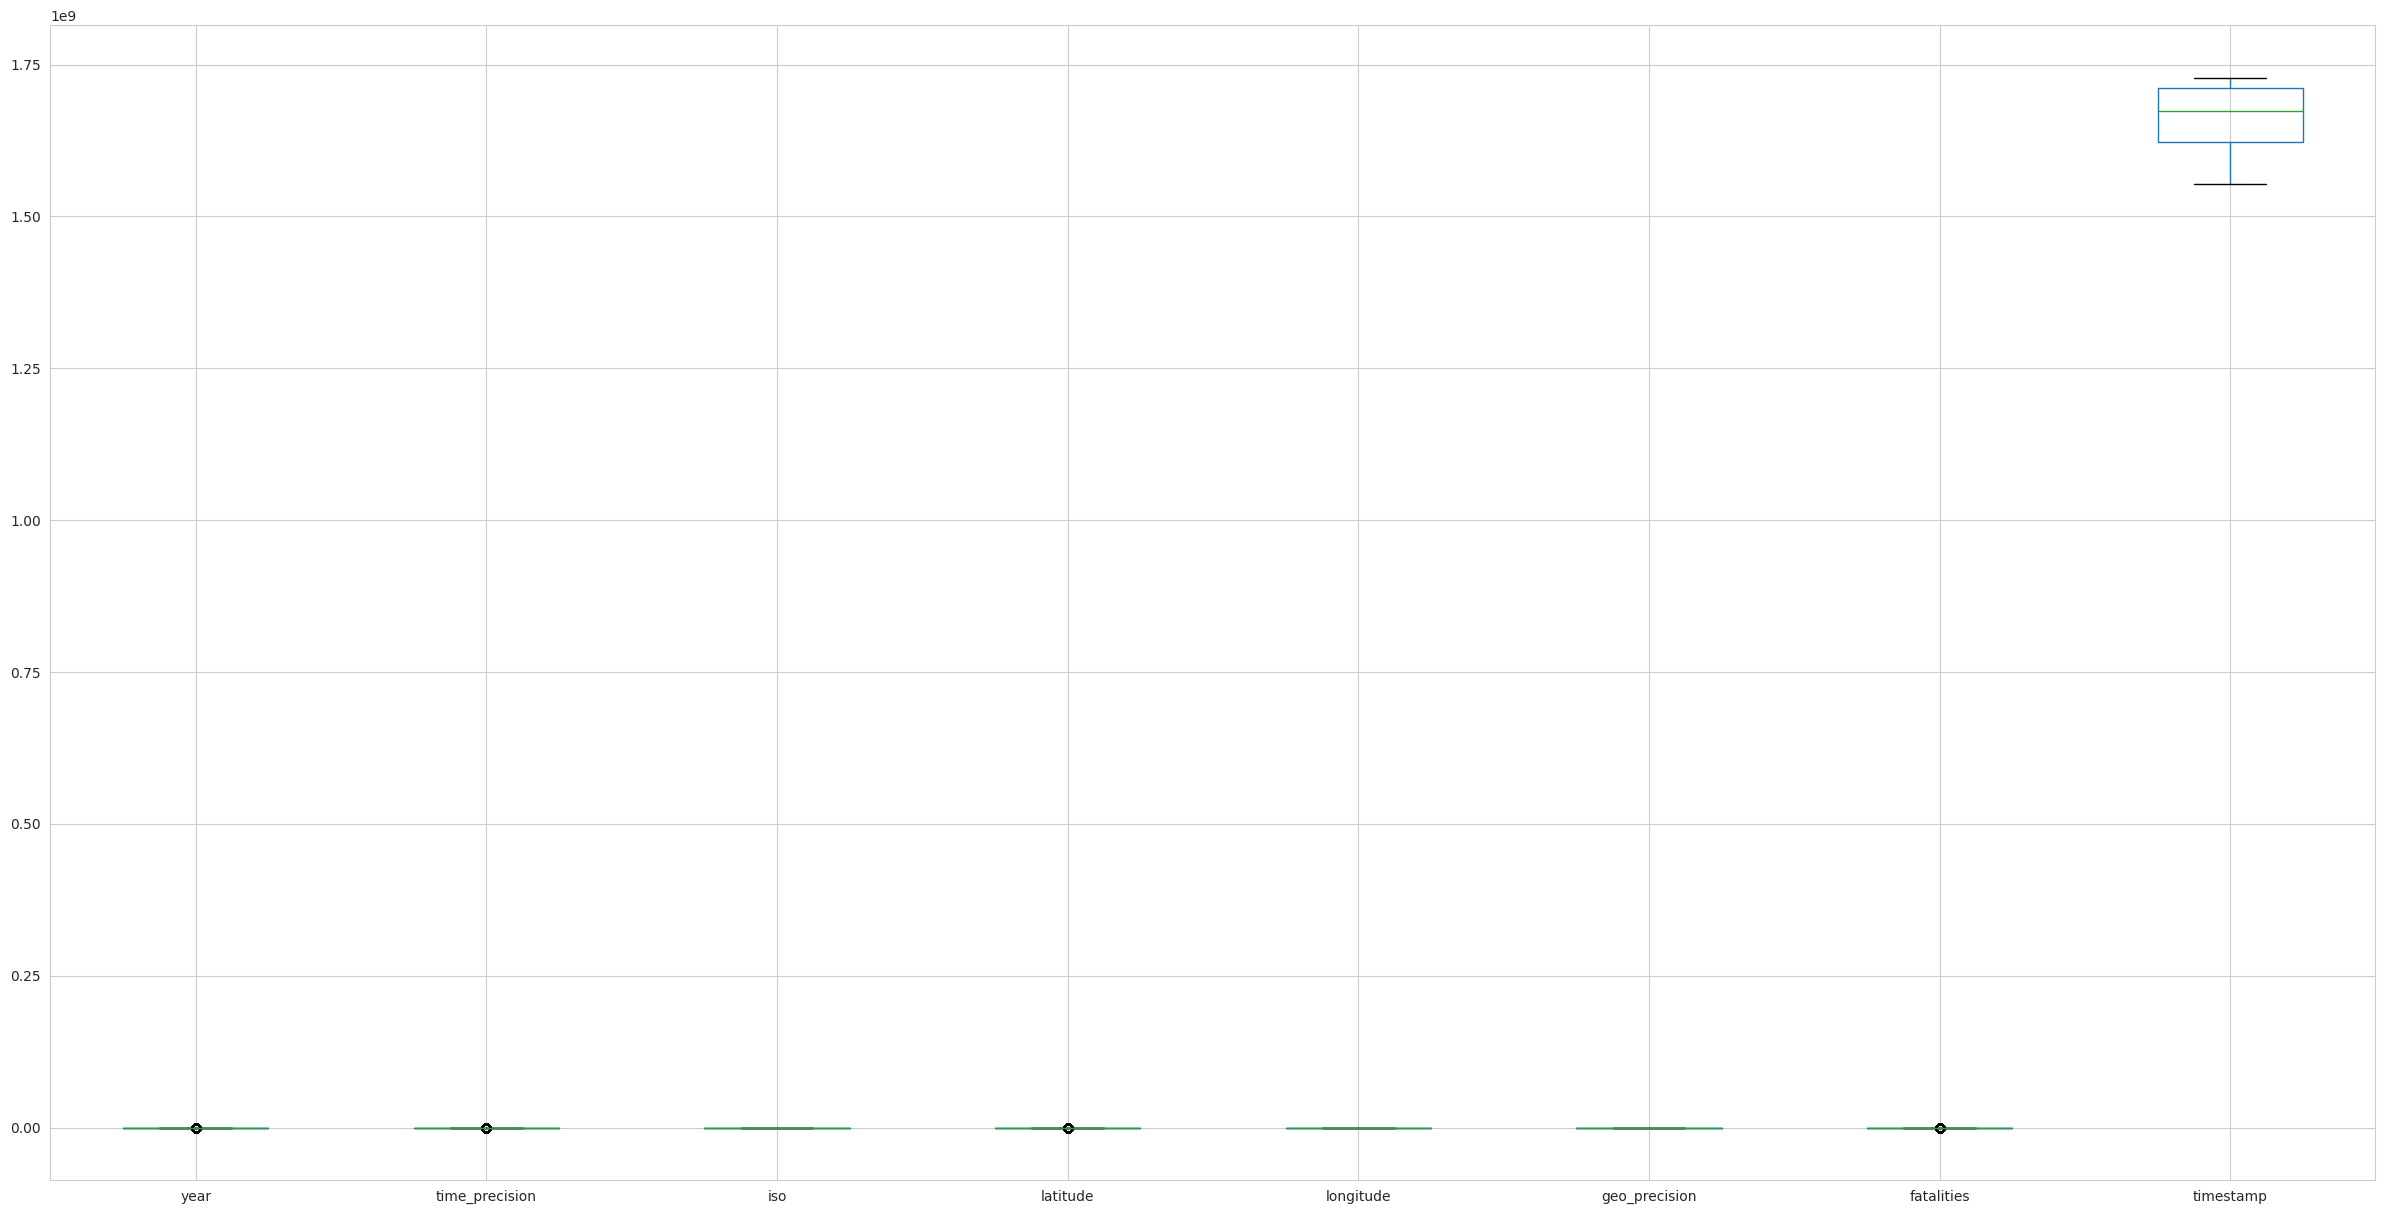

In [ ]:
acled_data.boxplot(figsize=(30, 15))
plt.show()

A bar chart of total fatalities by year

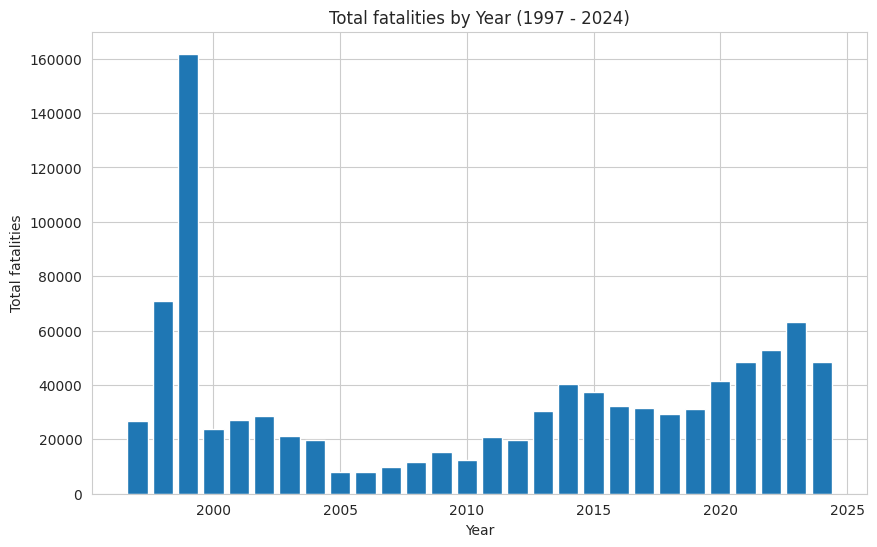

In [ ]:
# Convert 'EVENT_DATE' to datetime
acled_data['event_date'] = pd.to_datetime(acled_data['event_date'], format='mixed')

# Extract year from 'EVENT_DATE'
acled_data['event_year'] = acled_data['event_date'].dt.year

# Group data by year and sum fatalities
fatalities_by_year = acled_data.groupby('event_year')['fatalities'].sum().reset_index()

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(fatalities_by_year['event_year'], fatalities_by_year['fatalities'])
plt.xlabel('Year')
plt.ylabel('Total fatalities')
plt.title('Total fatalities by Year (1997 - 2024)')
plt.show()

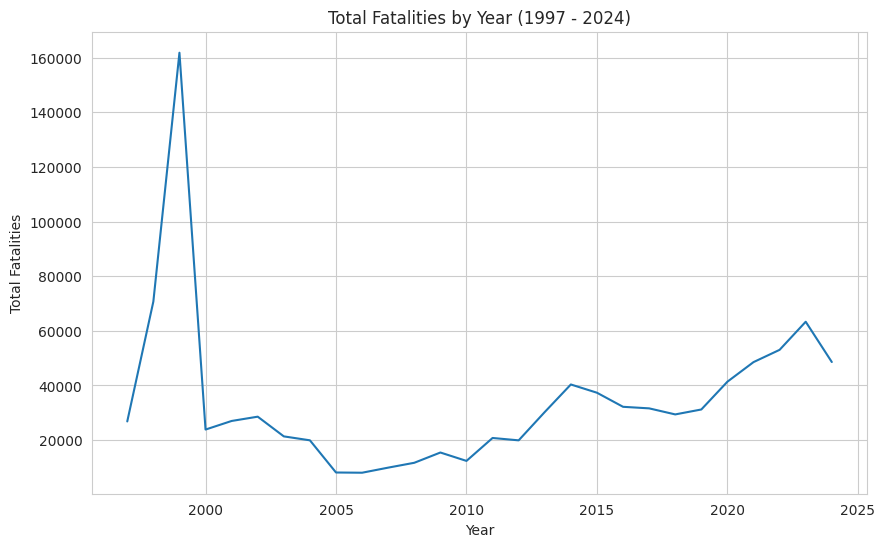

In [ ]:
# Assuming you have already converted 'EVENT_DATE' to datetime and extracted 'EVENT_YEAR'

# Group data by year and sum fatalities
fatalities_by_year = acled_data.groupby('event_year')['fatalities'].sum().reset_index()

# Create a line plot
plt.figure(figsize=(10, 6))
plt.plot(fatalities_by_year['event_year'], fatalities_by_year['fatalities'])
plt.xlabel('Year')
plt.ylabel('Total Fatalities')
plt.title('Total Fatalities by Year (1997 - 2024)')
plt.grid(True)  # Add a grid for better readability
plt.show()

In [ ]:
# Get the top 10 unique values
top_10_actors = acled_data['actor1'].value_counts().head(10).index.tolist()

# Create table data
table_data = [[actor] for actor in top_10_actors]

# Display the table with headers and formatting
print(tabulate(table_data, headers=["Top 10 Actors"], tablefmt="fancy_grid"))

╒══════════════════════════════════════════════╕
│ Top 10 Actors                                │
╞══════════════════════════════════════════════╡
│ Al Shabaab                                   │
├──────────────────────────────────────────────┤
│ Protesters (South Africa)                    │
├──────────────────────────────────────────────┤
│ Protesters (Morocco)                         │
├──────────────────────────────────────────────┤
│ Protesters (Algeria)                         │
├──────────────────────────────────────────────┤
│ JNIM: Group for Support of Islam and Muslims │
├──────────────────────────────────────────────┤
│ Rioters (South Africa)                       │
├──────────────────────────────────────────────┤
│ Protesters (Tunisia)                         │
├──────────────────────────────────────────────┤
│ Protesters (Nigeria)                         │
├──────────────────────────────────────────────┤
│ Unidentified Armed Group (Somalia)           │
├───────────────────

In [ ]:
# Get the top 10 unique values
top_10_actors = acled_data['actor2'].value_counts().head(10).index.tolist()

# Create table data
table_data = [[actor] for actor in top_10_actors]

# Display the table with headers and formatting
print(tabulate(table_data, headers=["Top 10 Actors"], tablefmt="fancy_grid"))

╒══════════════════════════════════════════╕
│ Top 10 Actors                            │
╞══════════════════════════════════════════╡
│ Civilians (Nigeria)                      │
├──────────────────────────────────────────┤
│ Civilians (Democratic Republic of Congo) │
├──────────────────────────────────────────┤
│ Civilians (Somalia)                      │
├──────────────────────────────────────────┤
│ Civilians (Sudan)                        │
├──────────────────────────────────────────┤
│ Al Shabaab                               │
├──────────────────────────────────────────┤
│ Civilians (Cameroon)                     │
├──────────────────────────────────────────┤
│ Civilians (Burundi)                      │
├──────────────────────────────────────────┤
│ Civilians (Mali)                         │
├──────────────────────────────────────────┤
│ Civilians (Burkina Faso)                 │
├──────────────────────────────────────────┤
│ Civilians (Kenya)                        │
╘═════════

In [ ]:
# Get the top 10 unique values
top_10_asso_actors1 = acled_data['assoc_actor_1'].value_counts().head(10).index.tolist()

# Create table data
table_data = [[actor] for actor in top_10_asso_actors1]

# Display the table with headers and formatting
print(tabulate(table_data, headers=["Top 10 Assoc-Actors1"], tablefmt="fancy_grid"))

╒════════════════════════════════════════════════════════════════════════════════════════════════════════════════╕
│ Top 10 Assoc-Actors1                                                                                           │
╞════════════════════════════════════════════════════════════════════════════════════════════════════════════════╡
│ Pastoralists (Nigeria)                                                                                         │
├────────────────────────────────────────────────────────────────────────────────────────────────────────────────┤
│ Resistance Committees (Sudan)                                                                                  │
├────────────────────────────────────────────────────────────────────────────────────────────────────────────────┤
│ Students (South Africa)                                                                                        │
├───────────────────────────────────────────────────────────────────────────────

In [ ]:
# Get the top 10 unique values
top_10_asso_actors_2 = acled_data['assoc_actor_2'].value_counts().head(10).index.tolist()

# Create table data
table_data = [[actor] for actor in top_10_asso_actors_2]

# Display the table with headers and formatting
print(tabulate(table_data, headers=["Top 10 Assoc2-Actors"], tablefmt="fancy_grid"))

╒═══════════════════════════════════════╕
│ Top 10 Assoc2-Actors                  │
╞═══════════════════════════════════════╡
│ Women (Democratic Republic of Congo)  │
├───────────────────────────────────────┤
│ Labor Group (Cameroon)                │
├───────────────────────────────────────┤
│ MDC: Movement for Democratic Change   │
├───────────────────────────────────────┤
│ Labor Group (Nigeria)                 │
├───────────────────────────────────────┤
│ Farmers (Nigeria)                     │
├───────────────────────────────────────┤
│ CNL: National Congress for Liberation │
├───────────────────────────────────────┤
│ Women (Sudan)                         │
├───────────────────────────────────────┤
│ Refugees/IDPs (Sudan)                 │
├───────────────────────────────────────┤
│ Women (Nigeria)                       │
├───────────────────────────────────────┤
│ Tigray Ethnic Militia (Ethiopia)      │
╘═══════════════════════════════════════╛


In [ ]:
from tabulate import tabulate

# Get unique values of 'country'
countries_unique = acled_data['country'].unique()

# Create table data
table_data = [[country] for country in countries_unique]

# Display the table with headers and formatting
print(tabulate(table_data, headers=["Country"], tablefmt="fancy_grid"))

╒══════════════════════════════════════════════╕
│ Country                                      │
╞══════════════════════════════════════════════╡
│ Mali                                         │
├──────────────────────────────────────────────┤
│ Burkina Faso                                 │
├──────────────────────────────────────────────┤
│ Djibouti                                     │
├──────────────────────────────────────────────┤
│ Democratic Republic of Congo                 │
├──────────────────────────────────────────────┤
│ Ethiopia                                     │
├──────────────────────────────────────────────┤
│ Ghana                                        │
├──────────────────────────────────────────────┤
│ Kenya                                        │
├──────────────────────────────────────────────┤
│ Libya                                        │
├──────────────────────────────────────────────┤
│ Malawi                                       │
├───────────────────

Top Actors by Fatalities Inflicted



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



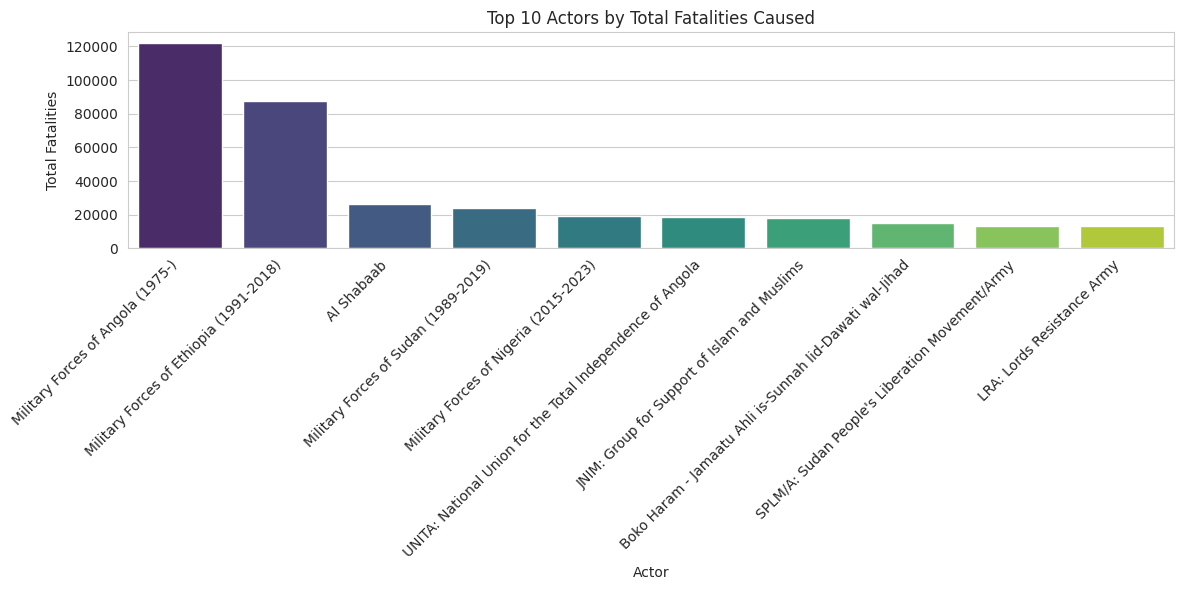

In [ ]:
# Group data by actor1 and sum fatalities
fatalities_by_actor = acled_data.groupby('actor1')['fatalities'].sum().reset_index()

# Sort by fatalities in descending order and select top 10
top_10_actors = fatalities_by_actor.sort_values(by='fatalities', ascending=False).head(10)

# Create a bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x='actor1', y='fatalities', data=top_10_actors, palette='viridis')
plt.title('Top 10 Actors by Total Fatalities Caused')
plt.xlabel('Actor')
plt.ylabel('Total Fatalities')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

**Line chart of fatality by event actors (1997 - 2024)**

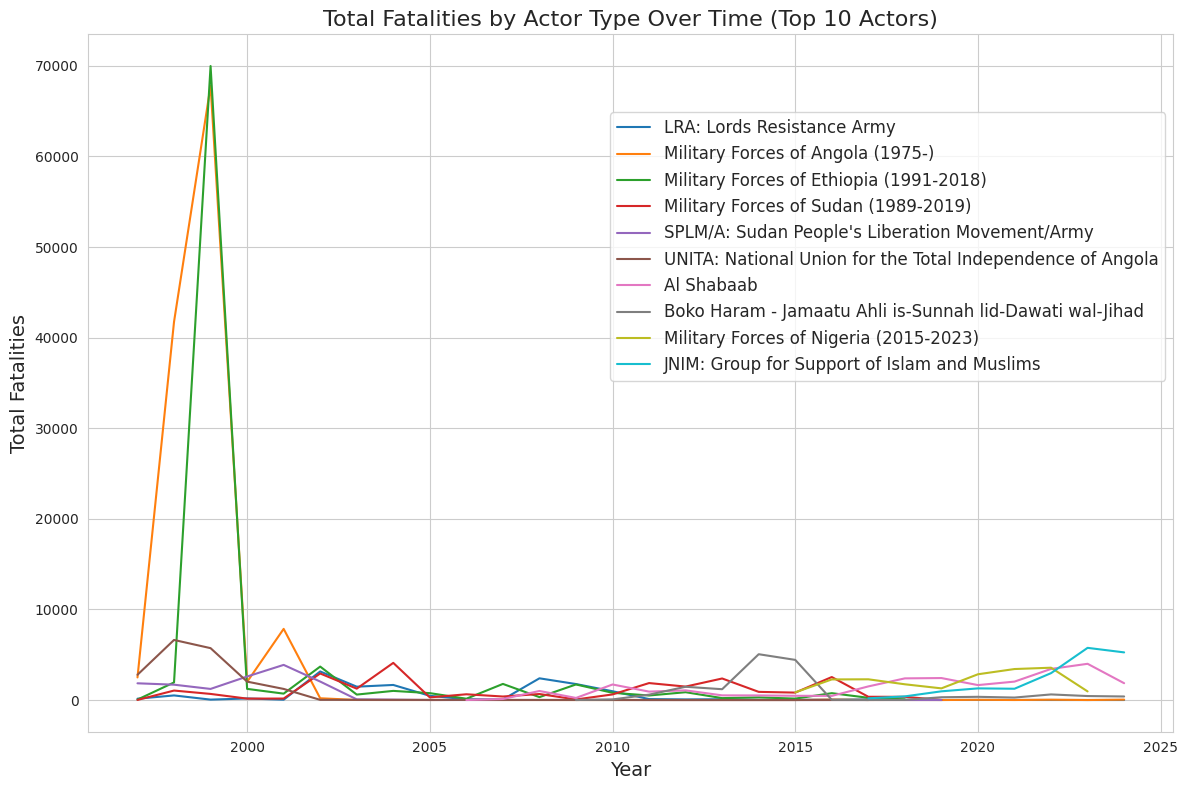

In [ ]:
# Group data by actor type and year, then sum fatalities
fatalities_over_time = acled_data.groupby(['year', 'actor1'])['fatalities'].sum().reset_index()

# Limit the number of actors to the top 10 for plotting
top_actors = fatalities_over_time.groupby('actor1')['fatalities'].sum().nlargest(10).index
fatalities_over_time_top10 = fatalities_over_time[fatalities_over_time['actor1'].isin(top_actors)]

# Create the line plot using seaborn
plt.figure(figsize=(12, 8))
sns.lineplot(x='year', y='fatalities', hue='actor1', data=fatalities_over_time_top10)
plt.title('Total Fatalities by Actor Type Over Time (Top 10 Actors)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Total Fatalities', fontsize=14)

# Adjust legend for better readability
plt.legend(loc='upper right', bbox_to_anchor=(1, 0.9), ncol=1, fontsize=12)

# Add grid for better visualization
plt.grid(True)
plt.tight_layout()

plt.show()

**Bar chart of fatality by event actors (1997 - 2024)**

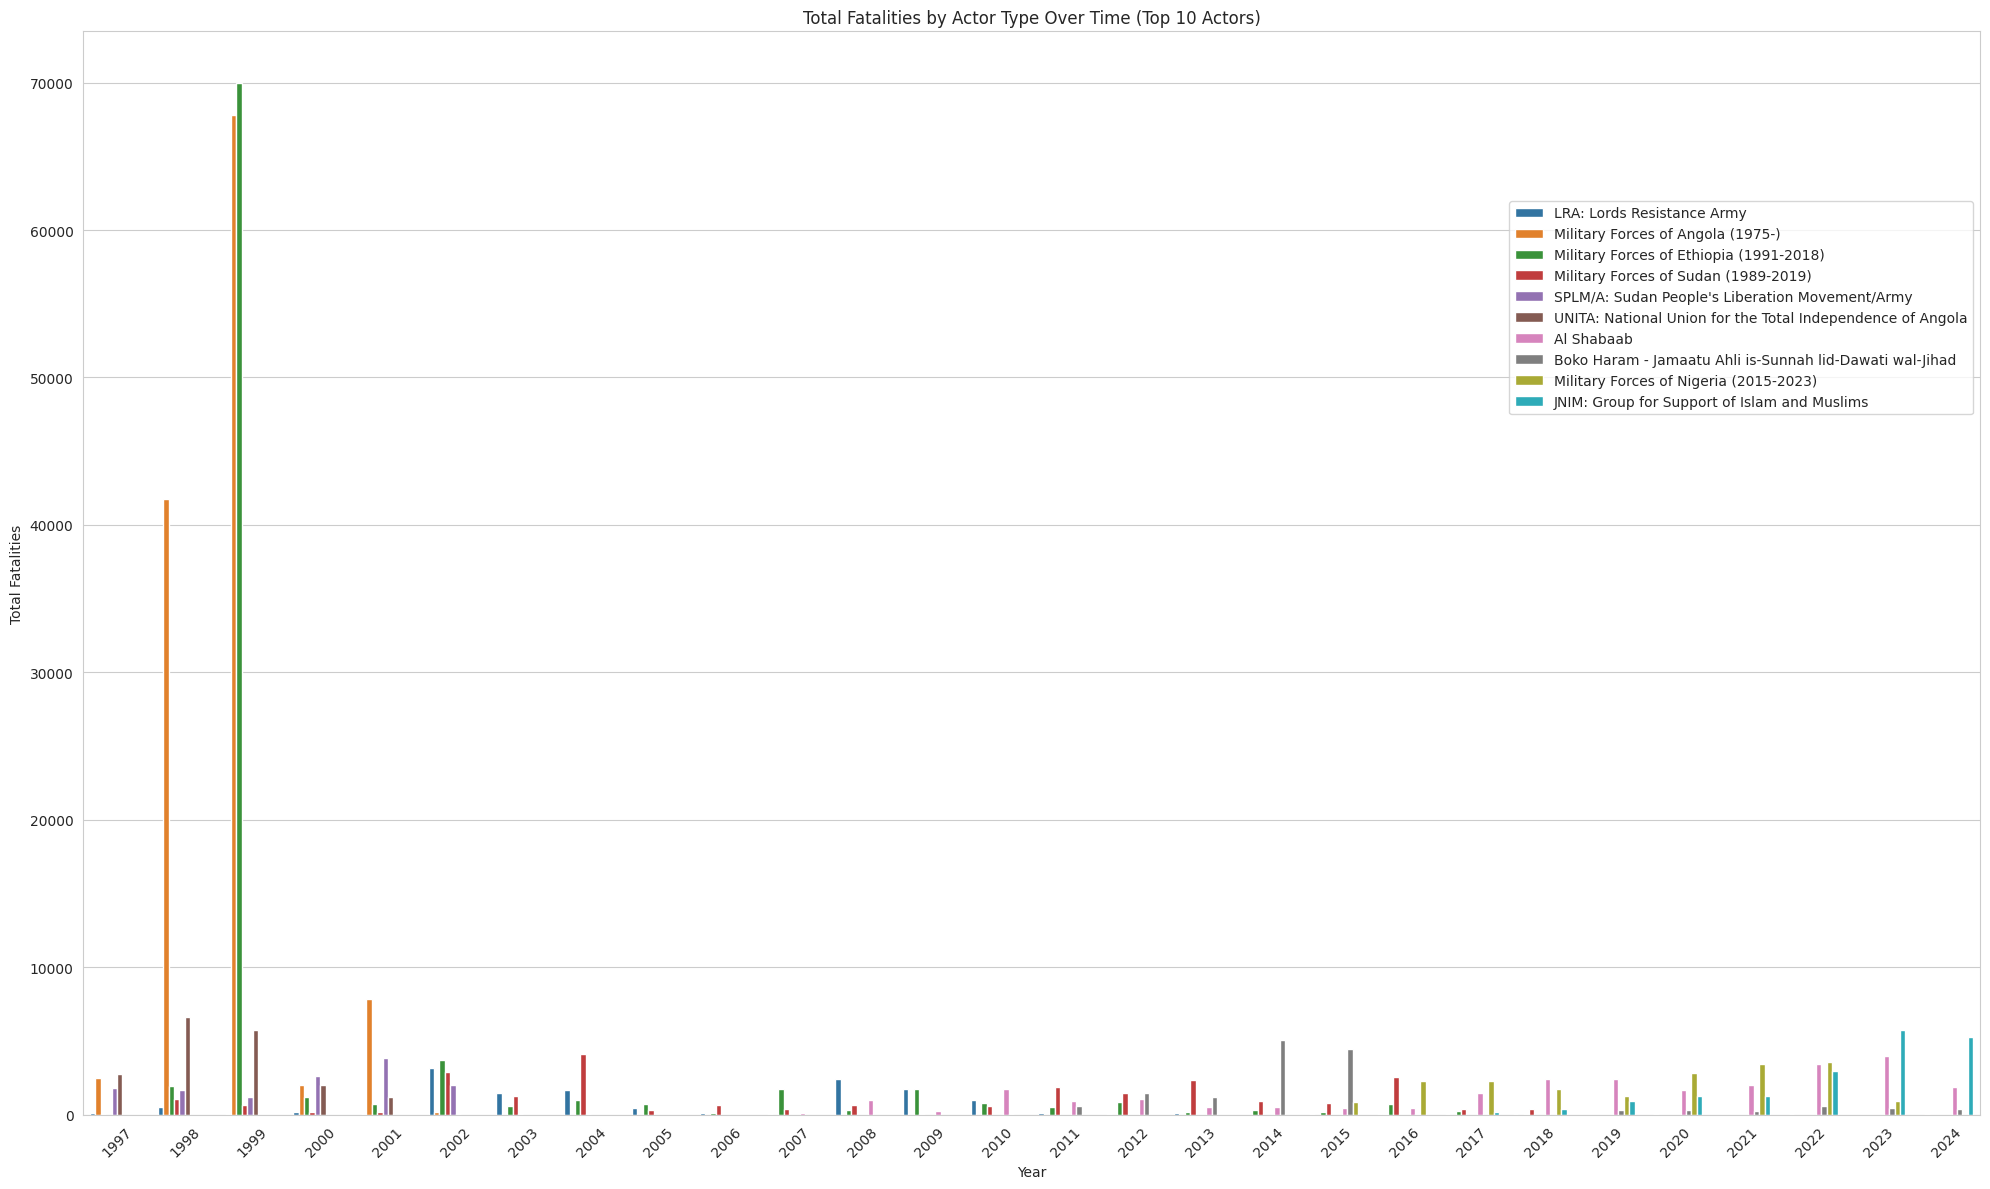

In [ ]:
# Group data by actor type and year, then sum fatalities
fatalities_over_time = acled_data.groupby(['year', 'actor1'])['fatalities'].sum().reset_index()

# Limit the number of actors to the top 10 for plotting
top_actors = fatalities_over_time.groupby('actor1')['fatalities'].sum().nlargest(10).index
fatalities_over_time_top10 = fatalities_over_time[fatalities_over_time['actor1'].isin(top_actors)]

# Create the bar plot using seaborn
plt.figure(figsize=(20, 12))
sns.barplot(x='year', y='fatalities', hue='actor1', data=fatalities_over_time_top10)
plt.title('Total Fatalities by Actor Type Over Time (Top 10 Actors)')
plt.xticks(rotation=45)
plt.xlabel('Year')
plt.ylabel('Total Fatalities')
plt.tight_layout()

# Adjust legend position for better readability
plt.legend(loc='upper right', bbox_to_anchor=(1, 0.85), ncol=1)

plt.show()

visualization of fatalities by event type using a bar char

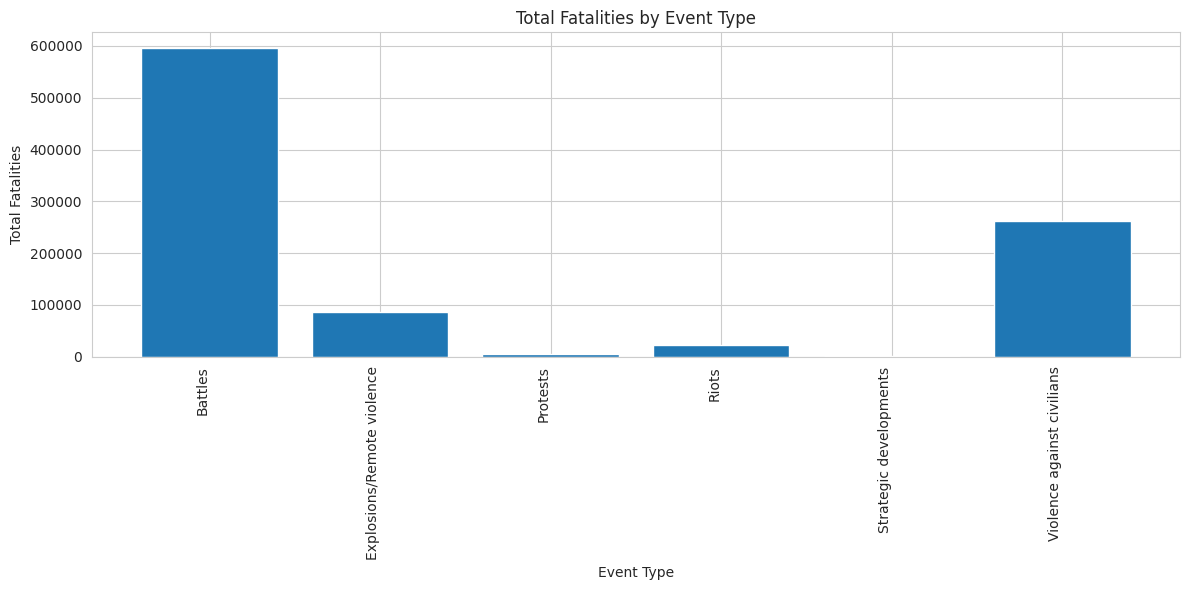

In [ ]:
# Group data by event type and sum fatalities
fatalities_by_event_type = acled_data.groupby('event_type')['fatalities'].sum().reset_index()

# Create a bar chart
plt.figure(figsize=(12, 6))
plt.bar(fatalities_by_event_type['event_type'], fatalities_by_event_type['fatalities'])
plt.xlabel('Event Type')
plt.ylabel('Total Fatalities')
plt.title('Total Fatalities by Event Type')
plt.xticks(rotation=90, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

Temporal Analysis

Visualizing total events over time

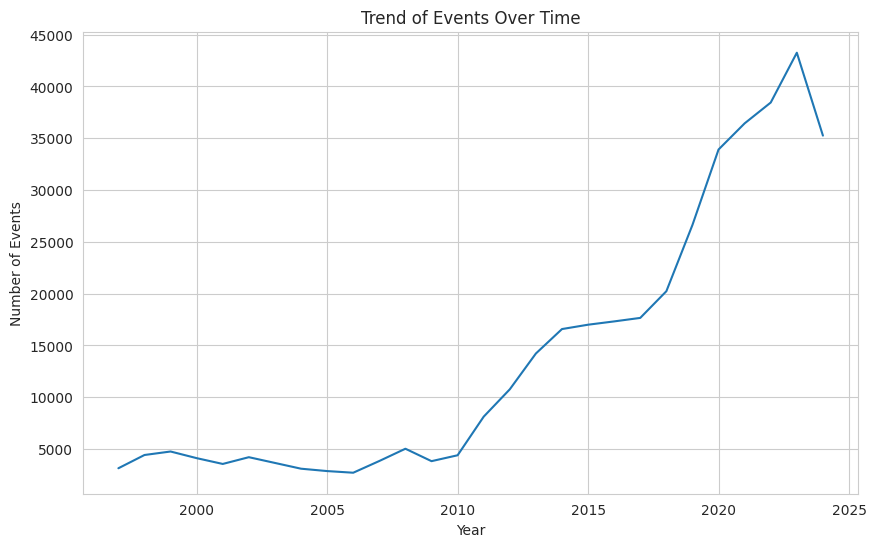

In [ ]:
# Convert 'EVENT_DATE' to datetime
acled_data['event_date'] = pd.to_datetime(acled_data['event_date'], format='mixed')

# Extract year from 'EVENT_DATE'
acled_data['year'] = acled_data['event_date'].dt.year

# Group data by year and count events
events_by_year = acled_data.groupby('year')['event_type'].count()

# Create a line chart
plt.figure(figsize=(10, 6))
plt.plot(events_by_year.index, events_by_year.values)
plt.xlabel('Year')
plt.ylabel('Number of Events')
plt.title('Trend of Events Over Time')
plt.show()

Visualizing total events over time by country

In [ ]:
import plotly.express as px

#Convert 'EVENT_DATE' to datetime. Use infer_datetime_format to handle multiple date formats
acled_data['event_date'] = pd.to_datetime(acled_data['event_date'], format='mixed')

# Time Series of Events Over Time (with Plotly)
events_over_time = acled_data.groupby('event_date')['country'].count().reset_index()

fig = px.line(events_over_time, x='event_date', y='country', title='Number of Events Over Time') # Also update here
fig.show()

Number of Events over time by event type

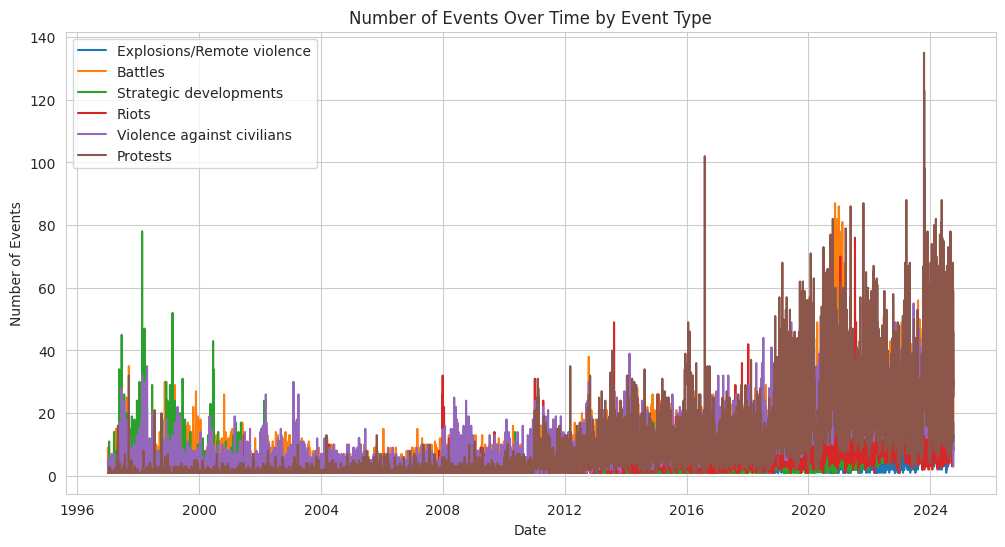

In [ ]:
# Time Series with Event Type Segmentation (Matplotlib)
plt.figure(figsize=(12, 6))
for event_type in acled_data['event_type'].unique():
  df_temp = acled_data[acled_data['event_type'] == event_type].groupby('event_date')['event_id_cnty'].count()
  plt.plot(df_temp, label=event_type)
plt.title('Number of Events Over Time by Event Type')
plt.xlabel('Date')
plt.ylabel('Number of Events')
plt.legend()
# plt.grid(True)
plt.show()

**Word Clouds**
  
The functionality of Pandas has helped me to highlight the most frequent words used in event descriptions of conflicts. Here I have created a word cloud from the 'DESCRPITION column to see the dominant words associated with specific event types or time periods.

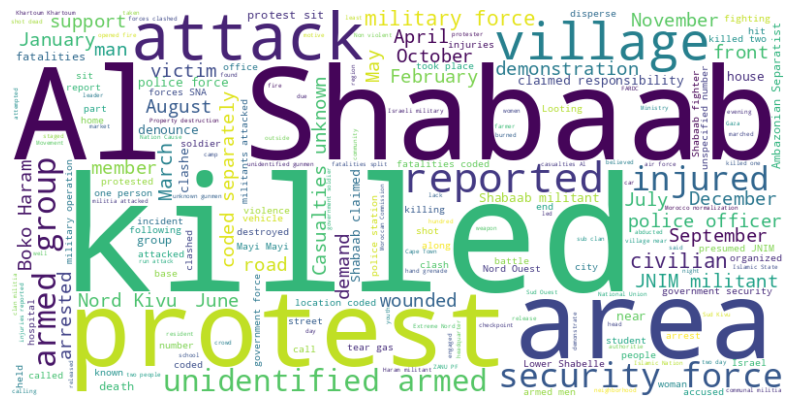

In [ ]:
text = ' '.join(acled_data['notes'].astype(str).tolist())
stopwords = set(STOPWORDS)
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stopwords).generate(text)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

**VARIABLE INTERACTIONS**

**Cross-tabulation of actor1 and actor2**

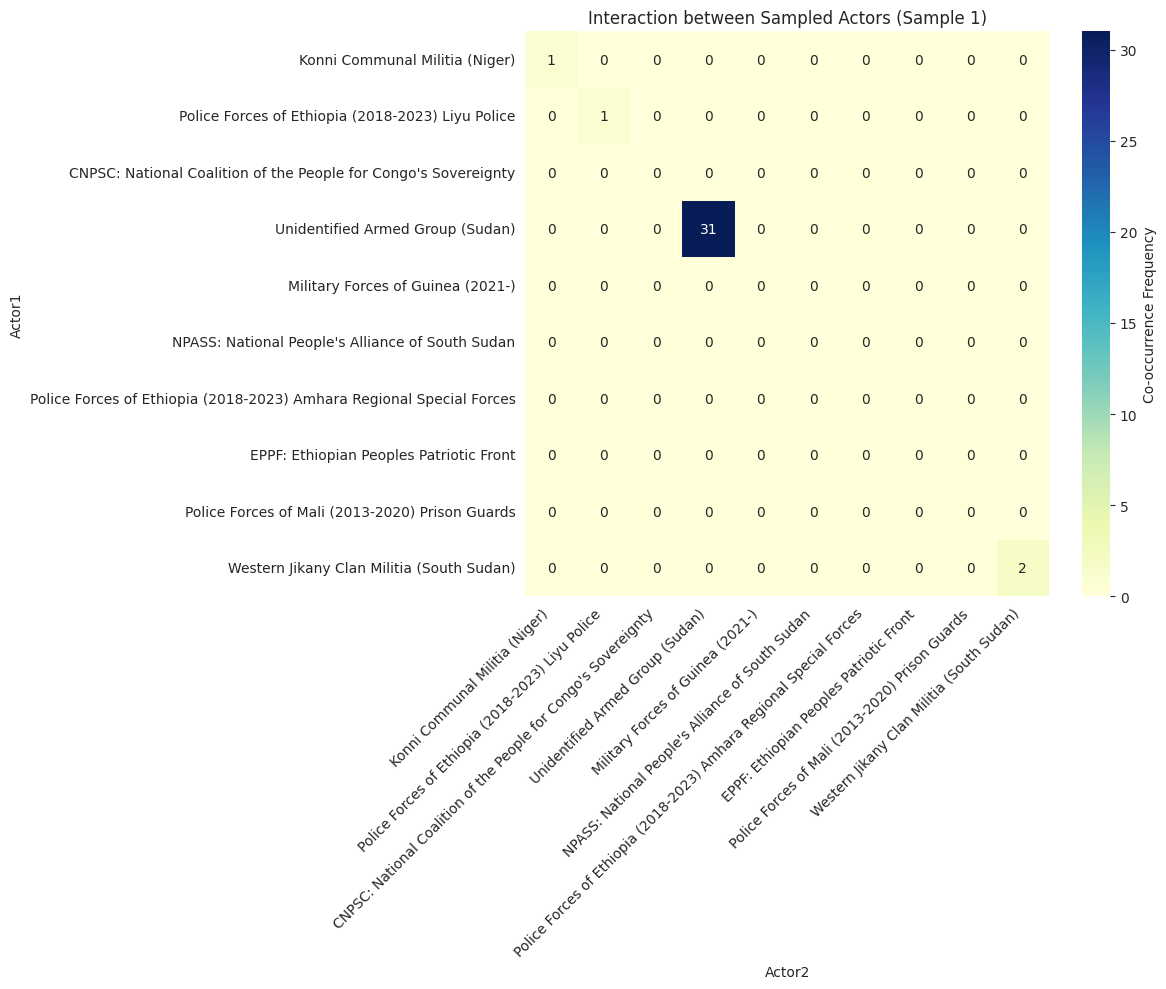

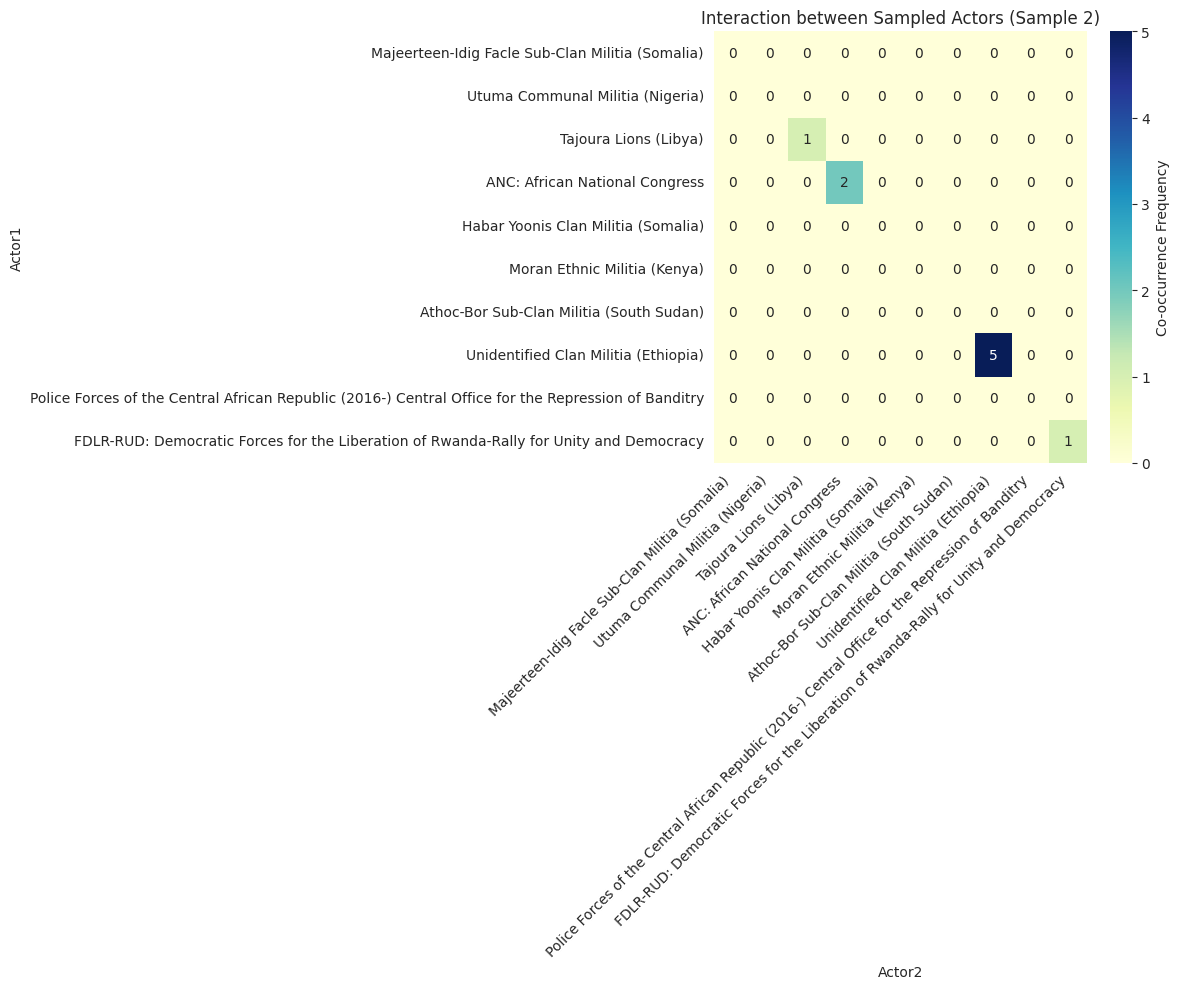

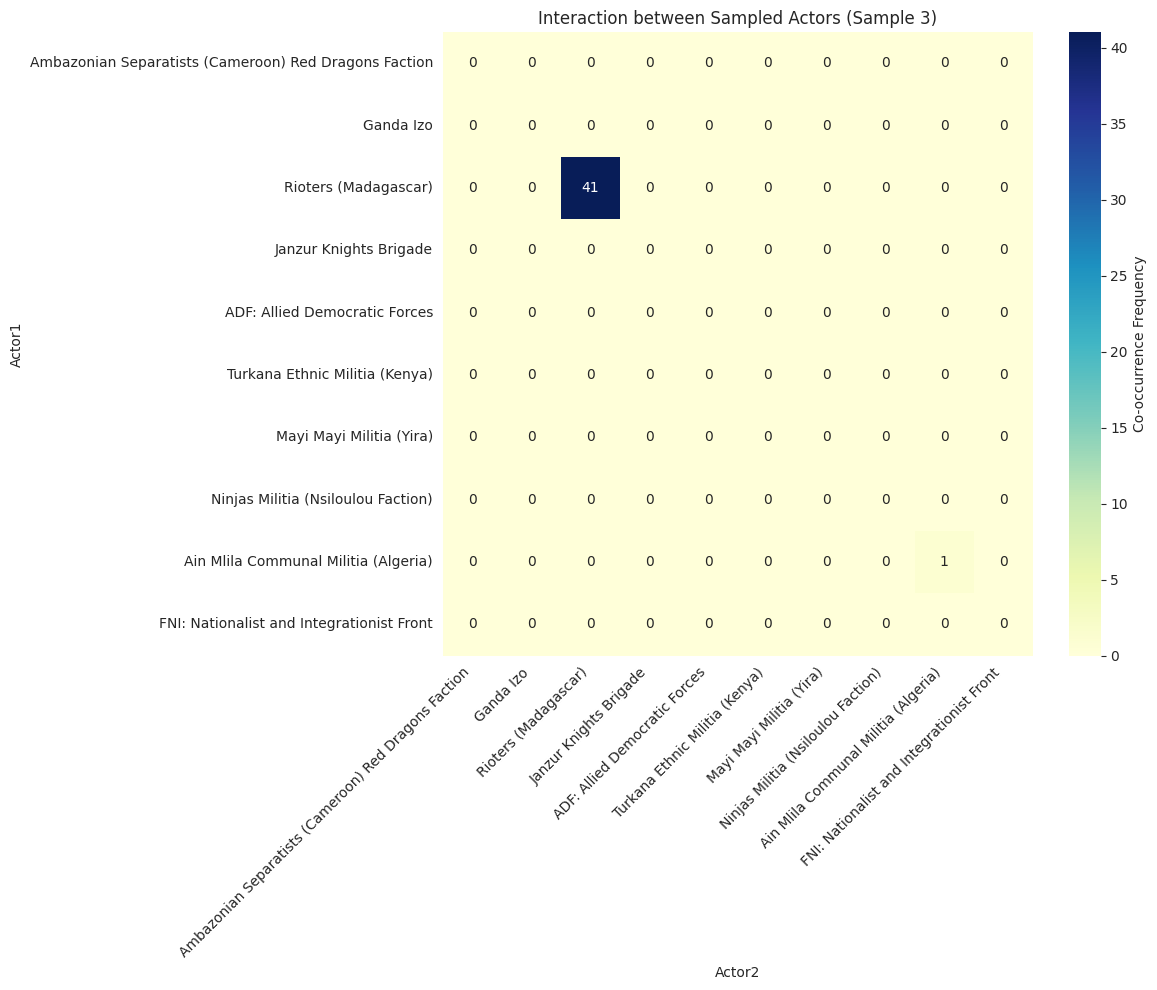

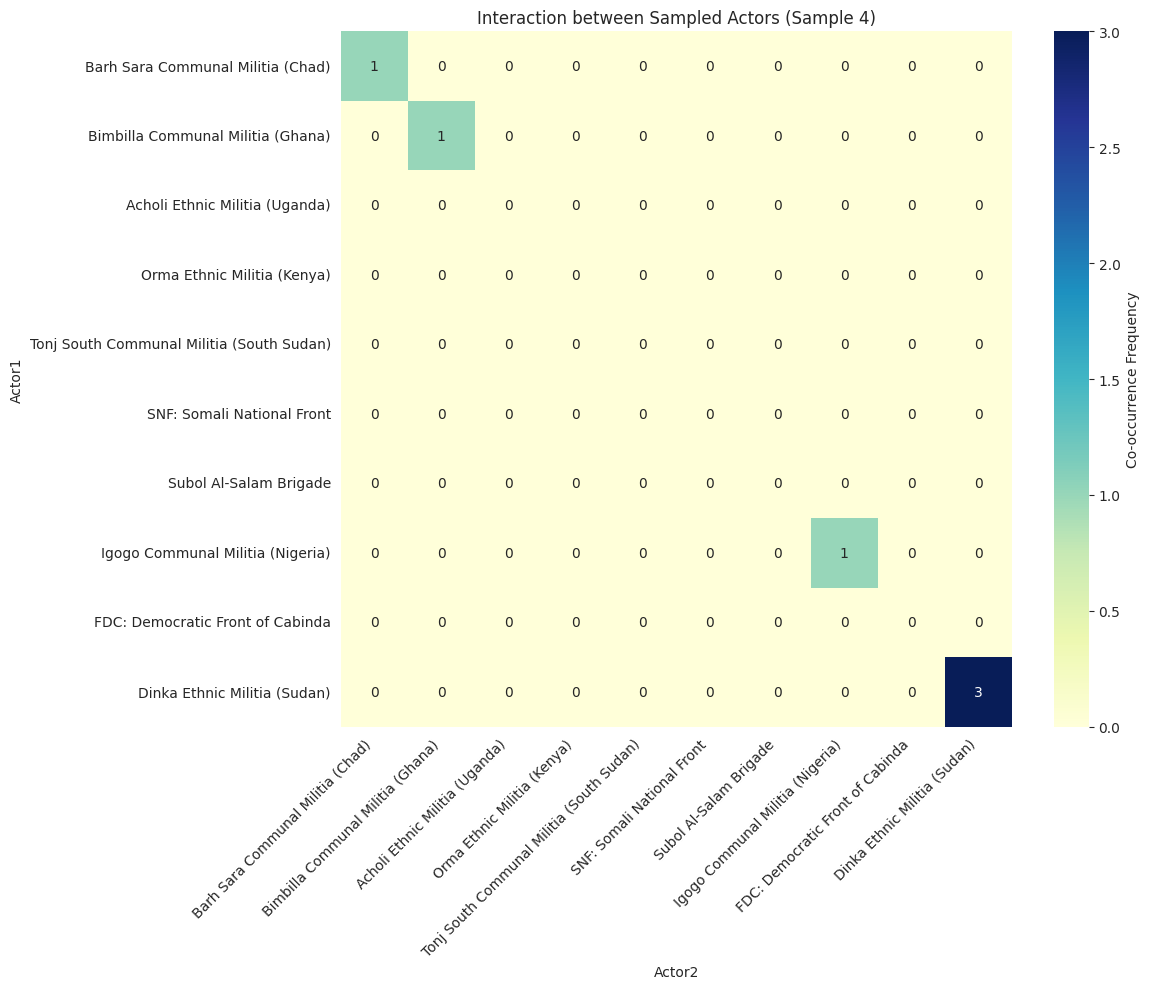

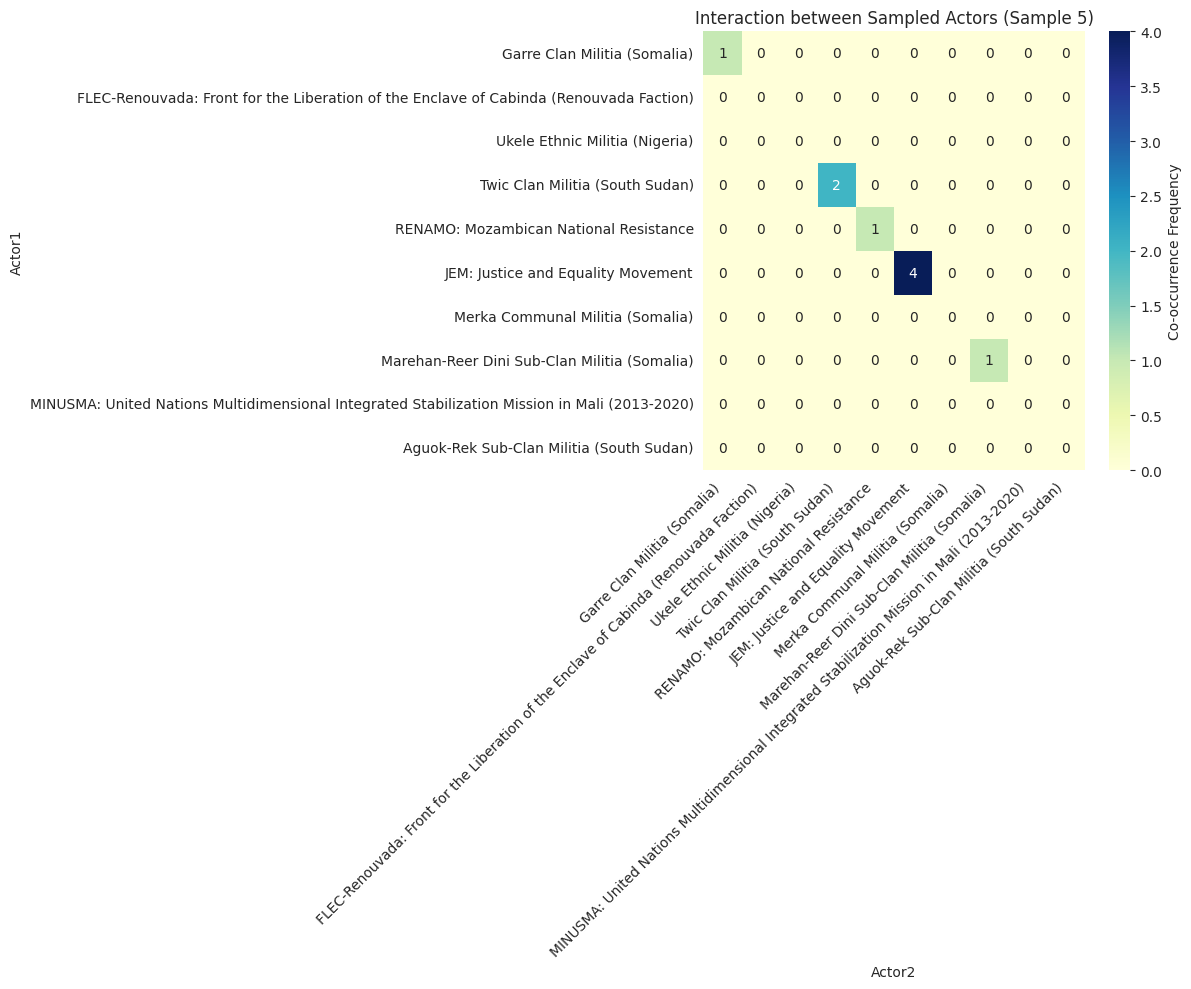

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Create a cross-tabulation of actor1 and actor2
actor_interaction = pd.crosstab(acled_data['actor1'], acled_data['actor2'])

num_samples = 5  # Number of samples to create
num_actors_to_sample = 10  # Number of actors per sample

for i in range(num_samples):
    # 1. Sample Actors:
    # Ensure sampled actors are present in both index and columns
    sampled_actors = np.random.choice(actor_interaction.index.intersection(actor_interaction.columns), size=num_actors_to_sample, replace=False)

    # 2. Filter Interaction Matrix:
    sampled_interaction = actor_interaction.loc[sampled_actors, sampled_actors]

    # 3. Create Heatmap:
    plt.figure(figsize=(12, 10))
    sns.heatmap(sampled_interaction, cmap="YlGnBu", annot=True, fmt="d", cbar_kws={'label': 'Co-occurrence Frequency'})
    plt.title(f'Interaction between Sampled Actors (Sample {i + 1})')
    plt.xlabel('Actor2')
    plt.ylabel('Actor1')
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

**Interaction between Event Type and Actor Type**

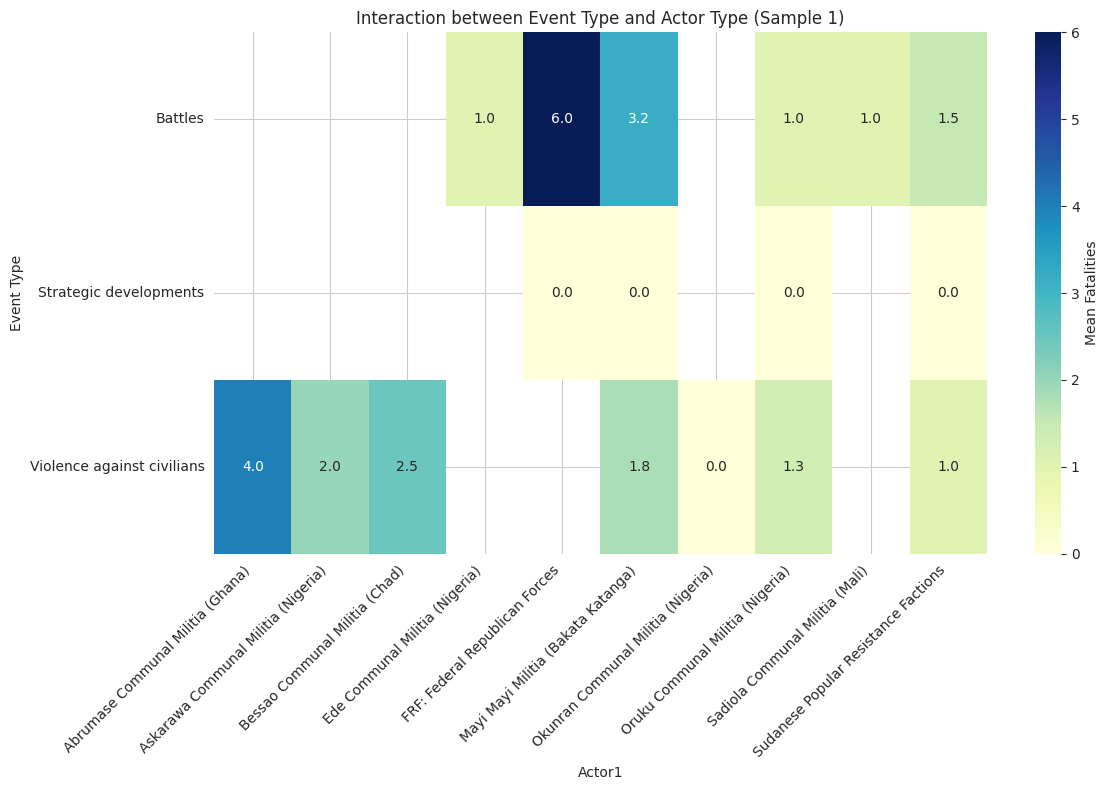

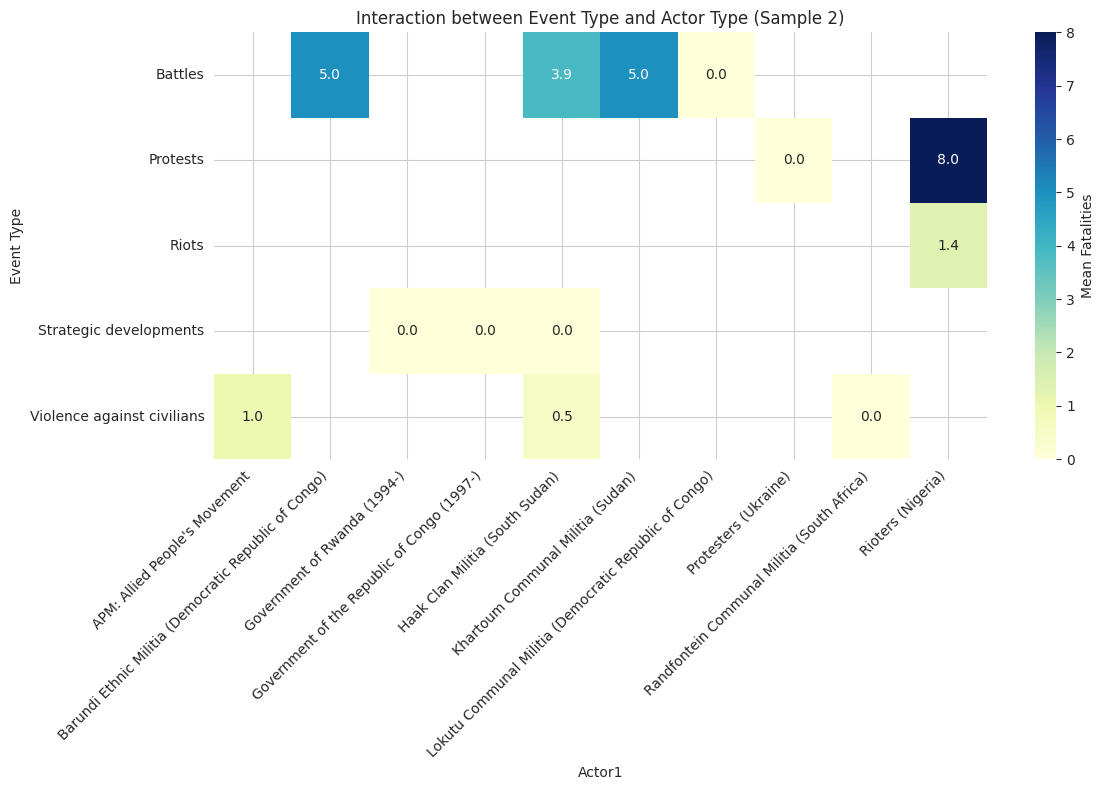

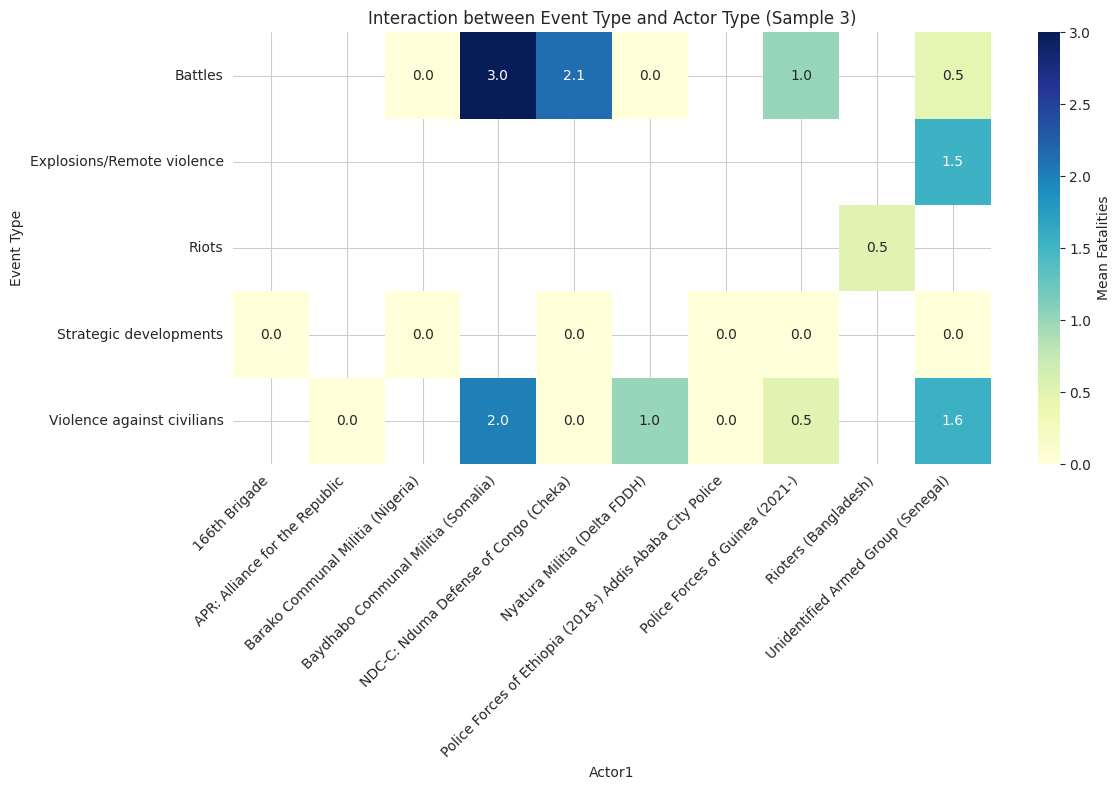

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Group data by event type and actor1, calculate mean fatalities
interaction_data = acled_data.groupby(['event_type', 'actor1'])['fatalities'].mean().reset_index()

# Number of samples and actors per sample
num_samples = 3  # Adjust as needed
num_actors_to_sample = 10  # Adjust as needed

# Get the number of unique event types
num_unique_event_types = len(interaction_data['event_type'].unique())

# Iterate to create multiple visualizations
for i in range(num_samples):
    # Sample event types and actors (adjust sample sizes as needed)
    sampled_event_types = np.random.choice(interaction_data['event_type'].unique(),
                                           size=min(num_unique_event_types, 10),
                                           replace=False)
    sampled_actors = np.random.choice(interaction_data['actor1'].unique(), size=num_actors_to_sample, replace=False)

    # Filter data based on sampled event types and actors
    filtered_data = interaction_data[
        interaction_data['event_type'].isin(sampled_event_types) &
        interaction_data['actor1'].isin(sampled_actors)
    ]

    # Pivot the data for heatmap
    interaction_matrix = filtered_data.pivot(index='event_type', columns='actor1', values='fatalities')

    # Create heatmap with sample number in title
    plt.figure(figsize=(12, 8))
    sns.heatmap(interaction_matrix, cmap="YlGnBu", annot=True, fmt=".1f", cbar_kws={'label': 'Mean Fatalities'})
    plt.title(f'Interaction between Event Type and Actor Type (Sample {i + 1})')  # Add sample number
    plt.xlabel('Actor1')
    plt.ylabel('Event Type')
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

#**Data Pre-Processing and Feature Engineering**




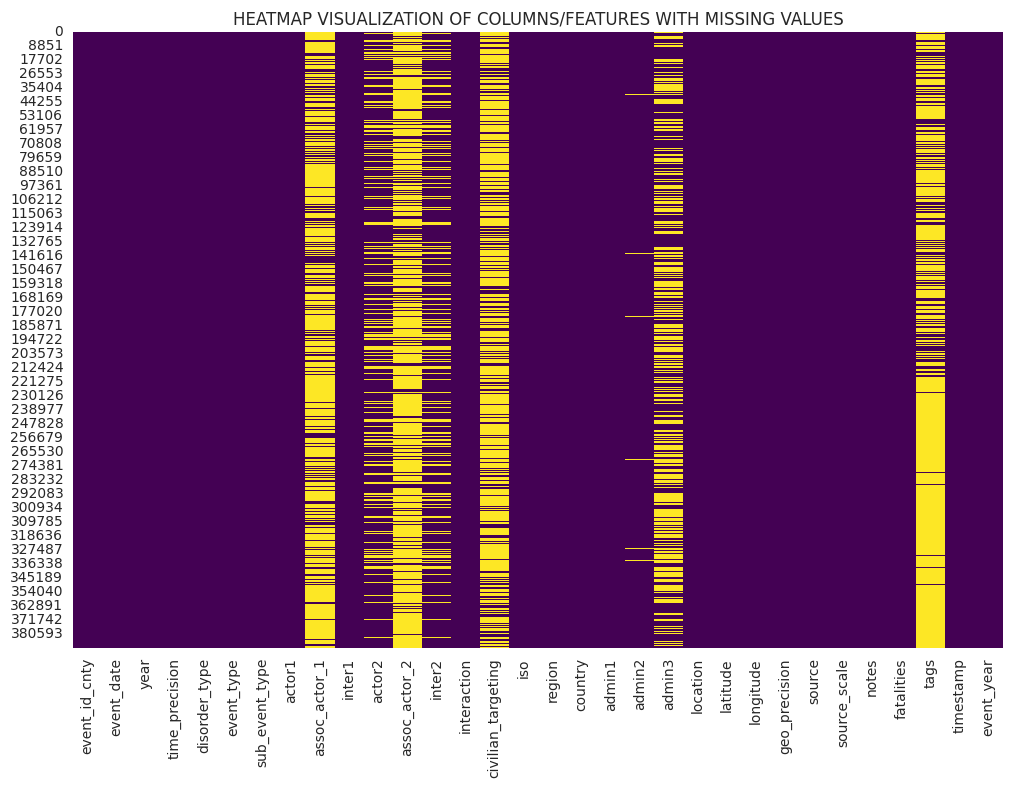

In [ ]:
# Visualizing missing data
plt.figure(figsize=(12, 8))
sns.heatmap(acled_data.isnull(), cbar=False, cmap='viridis')
plt.title('HEATMAP VISUALIZATION OF COLUMNS/FEATURES WITH MISSING VALUES')
plt.show()

1 Feature Engineering

In [ ]:
def preprocess_data(acled_data):

    # Missing indicators for columns with a large proportion of missing data
    acled_data['assoc_actor_1_missing'] = acled_data['assoc_actor_1'].isnull().astype(int)
    acled_data['actor2_missing'] = acled_data['actor2'].isnull().astype(int)
    acled_data['assoc_actor_2_missing'] = acled_data['assoc_actor_2'].isnull().astype(int)
    acled_data['civilian_targeting_missing'] = acled_data['civilian_targeting'].isnull().astype(int)

    # Handling missing values in high-missing columns with placeholders
    fill_placeholder_cols = ['assoc_actor_1', 'actor2', 'assoc_actor_2', 'civilian_targeting', 'admin3', 'tags']
    acled_data[fill_placeholder_cols] = acled_data[fill_placeholder_cols].fillna('Not specified')

    # Fill missing values in admin columns with "Not specified" if they lack logical fill
    acled_data[['admin1', 'inter2','admin2']] = acled_data[['admin1', 'inter2','admin2']].fillna('Not specified')

    # Convert event_date to datetime and extract features
    acled_data['event_date'] = pd.to_datetime(acled_data['event_date'])
    acled_data['month'] = acled_data['event_date'].dt.month
    acled_data['quarter'] = acled_data['month'].apply(lambda x: (x - 1) // 3 + 1)

    # Rolling sum of fatalities over time windows
    acled_data['fatalities_7d'] = acled_data.groupby('location')['fatalities'].rolling(window=7, min_periods=1).sum().reset_index(0, drop=True)
    acled_data['fatalities_30d'] = acled_data.groupby('location')['fatalities'].rolling(window=30, min_periods=1).sum().reset_index(0, drop=True)
    acled_data['fatalities_90d'] = acled_data.groupby('location')['fatalities'].rolling(window=90, min_periods=1).sum().reset_index(0, drop=True)

    # Frequency encoding for 'actor1'
    actor1_counts = acled_data['actor1'].value_counts()
    acled_data['actor1_freq'] = acled_data['actor1'].map(actor1_counts)

    # Target encoding for 'location'
    location_fatalities_mean = acled_data.groupby('location')['fatalities'].mean()
    acled_data['location_fatalities_mean'] = acled_data['location'].map(location_fatalities_mean)

    # I have droped the original date column since it is not needed now.
    acled_data.drop(columns=['event_date'], inplace=True)

    return acled_data


In [ ]:
# Preprocess the data
acled_data = preprocess_data(acled_data)

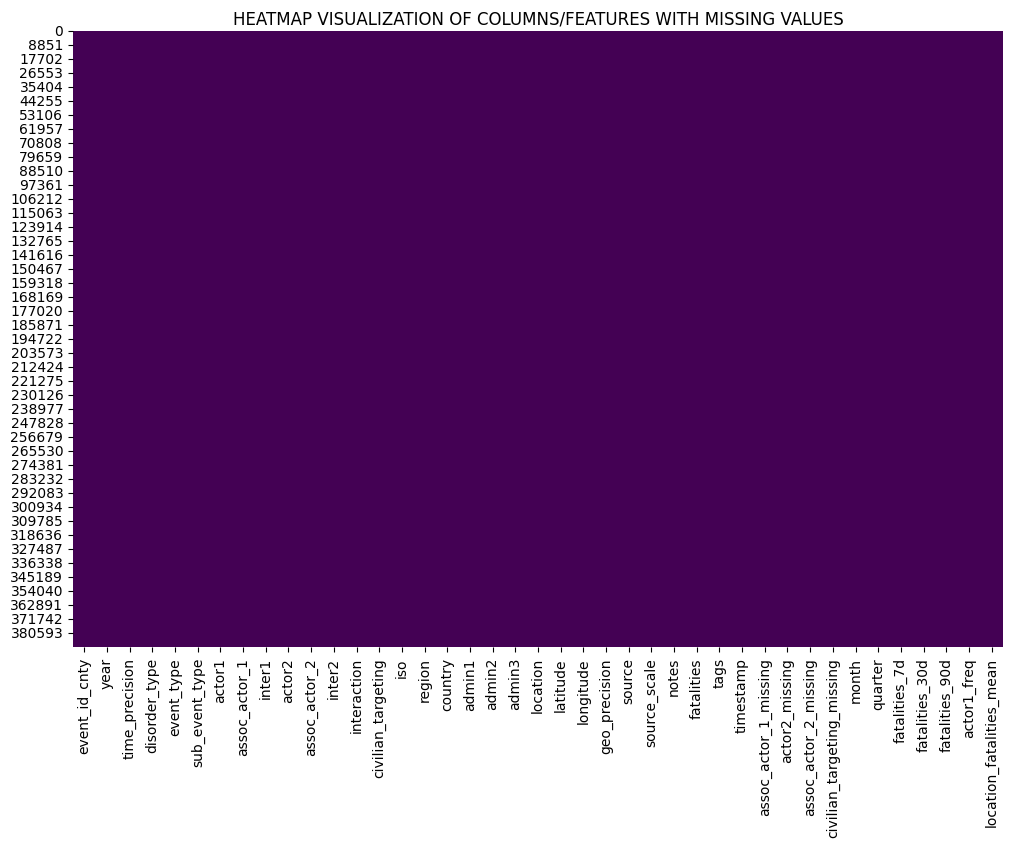

In [ ]:
# Visualizing data after handling missing values.
plt.figure(figsize=(12, 8))
sns.heatmap(acled_data.isnull(), cbar=False, cmap='viridis')
plt.title('HEATMAP VISUALIZATION OF COLUMNS/FEATURES WITH MISSING VALUES')
plt.show()

In [ ]:
# Split the data
X = acled_data.drop(columns=['fatalities', 'event_id_cnty'])
y = acled_data['fatalities']

In [ ]:
# 1. Split into training and validation and testing sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Split training+validation into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

Confirm Proportion of Data Split

In [ ]:
from sklearn.model_selection import train_test_split
from tabulate import tabulate

# ... (Your three-step split code here) ...

# Get the original data size
original_size = len(X)

# Calculate the sizes of each split
train_size = len(X_train)
val_size = len(X_val)
test_size = len(X_test)

# Calculate proportions
train_proportion = train_size / original_size
val_proportion = val_size / original_size
test_proportion = test_size / original_size

# Create table data
table_data = [
    ["Training Set", train_size, f"{train_proportion:.2f}"],
    ["Validation Set", val_size, f"{val_proportion:.2f}"],
    ["Testing Set", test_size, f"{test_proportion:.2f}"],
    ["Total", original_size, "1.00"],  # Added row for total size
]

# Print the formatted table
print(tabulate(table_data, headers=["Split", "Size", "Proportion"], tablefmt="fancy_grid"))

╒════════════════╤════════╤══════════════╕
│ Split          │   Size │   Proportion │
╞════════════════╪════════╪══════════════╡
│ Training Set   │ 233655 │          0.6 │
├────────────────┼────────┼──────────────┤
│ Validation Set │  77885 │          0.2 │
├────────────────┼────────┼──────────────┤
│ Testing Set    │  77885 │          0.2 │
├────────────────┼────────┼──────────────┤
│ Total          │ 389425 │          1   │
╘════════════════╧════════╧══════════════╛


In [ ]:
# Define the preprocessing and modeling pipeline
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

# Create preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('Numerical', StandardScaler(), numerical_features),
        ('Categorical', TargetEncoder(cols=categorical_features), categorical_features)
    ],
    remainder='passthrough'  # Keep the rest of the columns
)

# **DEVELOPING THE ML MODELS**



# **Linear Regression**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

Pipeline that preprocesses the data, then fits the model

In [ ]:
linear_regression_model = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Preprocessing step
    ('regressor', LinearRegression())])  # Regression model

Fit the model

In [ ]:
linear_regression_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/compose/_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Numerical', StandardScaler(),
                                                  ['year', 'time_precision',
                                                   'iso', 'latitude',
                                                   'longitude', 'geo_precision',
                                                   'timestamp',
                                                   'assoc_actor_1_missing',
                                                   'actor2_missing',
                                                   'assoc_actor_2_missing',
                                                   'civilian_targeting_missing',
                                                   'quarter', 'fatalities_7d',
                                                   'fatalities_30d',
                                                   'fatalities_9...
                                                                      'admin2',
                                                                      'admin3',
                                                                      'location',
                                                                      'source',
                                                                      'source_scale',
                                                                      'notes',
                                                                      'tags']),
                                                  ['disorder_type',
                                                   'event_type',
                                                   'sub_event_type', 'actor1',
                                                   'assoc_actor_1', 'inter1',
                                                   'actor2', 'assoc_actor_2',
                                                   'inter2', 'interaction',
                                                   'civilian_targeting',
                                                   'region', 'country',
                                                   'admin1', 'admin2', 'admin3',
                                                   'location', 'source',
                                                   'source_scale', 'notes',
                                                   'tags'])])),
                ('regressor', LinearRegression())])

Make predictions

In [ ]:
y_pred = linear_regression_model.predict(X_test)

Model Evaluation

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, median_absolute_error
from tabulate import tabulate
import numpy as np

# Assuming y_test and y_pred are defined
linear_mse = mean_squared_error(y_test, y_pred)
linear_rmse = np.sqrt(linear_mse)
linear_mae = mean_absolute_error(y_test, y_pred)
linear_r2 = r2_score(y_test, y_pred)

# Handle potential issues with zero or negative values in y_test for MAPE calculation
# Replace zero and negative values with a small positive value, e.g., 1e-10
y_test_mape = y_test.copy()  # Create a copy to avoid modifying the original y_test
y_test_mape[y_test_mape <= 0] = 1e-10

linear_msle = mean_squared_error(np.log1p(y_test_msle), np.log1p(y_pred_msle))

linear_medae = median_absolute_error(y_test, y_pred)
linear_adjusted_r2 = 1 - (1 - linear_r2) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)
linear_explained_variance = 1 - np.var(y_test - y_pred) / np.var(y_test)

# Create table data
table_data = [
    ["MSE", linear_mse],
    ["RMSE", linear_rmse],
    ["MAE", linear_mae],
    ["R-squared", linear_r2],
    ["Adjusted R-squared", linear_adjusted_r2],
    ["Median Absolute Error", linear_medae],
    ["Explained Variance", linear_explained_variance]
]

# Print the formatted table
print(tabulate(table_data, headers=["Metric", "Value"], tablefmt="fancy_grid"))

╒═══════════════════════╤════════════╕
│ Metric                │      Value │
╞═══════════════════════╪════════════╡
│ MSE                   │ 146.436    │
├───────────────────────┼────────────┤
│ RMSE                  │  12.1011   │
├───────────────────────┼────────────┤
│ MAE                   │   2.7025   │
├───────────────────────┼────────────┤
│ R-squared             │   0.771066 │
├───────────────────────┼────────────┤
│ Adjusted R-squared    │   0.77099  │
├───────────────────────┼────────────┤
│ Median Absolute Error │   1.11529  │
├───────────────────────┼────────────┤
│ Explained Variance    │   0.771086 │
╘═══════════════════════╧════════════╛


<ipython-input-33-16869864b095>:14: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1e-10' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  y_test_mape[y_test_mape <= 0] = 1e-10


In [ ]:

# 1. Scatter Plot of Predicted vs Actual Values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')  # 45-degree line
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Fatalities')
plt.ylabel('Predicted Fatalities')
plt.grid(True)
plt.show()

# 2. Residual Plot
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.7)
plt.axhline(y=0, color='red', linestyle='--')  # Line at 0
plt.title('Residual Plot')
plt.xlabel('Predicted Fatalities')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()



**Feature importance for Linear Regressor**

For Linear Regression, feature importance is determined by the absolute values of the coefficients. Larger coefficients indicate stronger influence on the target variable.

<ipython-input-24-789f781dd262>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance,


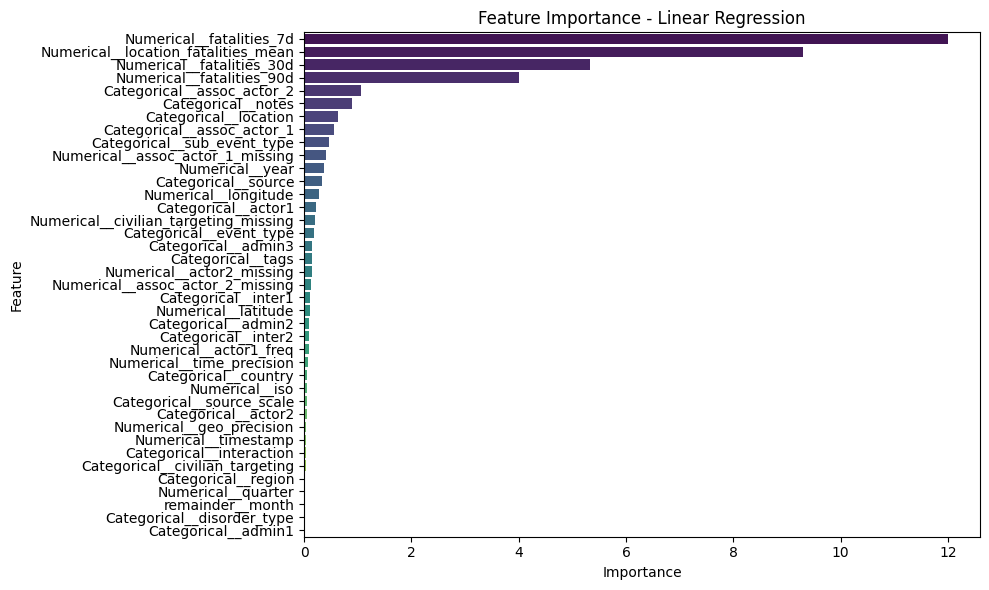

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'linear_regression_model' is your trained Linear Regression model
importances = abs(linear_regression_model.named_steps['regressor'].coef_)
features = linear_regression_model.named_steps['preprocessor'].get_feature_names_out()

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance,
            palette='viridis')  # Use 'viridis' color palette
plt.title('Feature Importance - Linear Regression')
plt.tight_layout()
plt.show()

# **Lasson Regression**

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from tabulate import tabulate

In [ ]:
# Set up a Pipeline with Lasso Regression
lasso_model = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Preprocessing step
    ('regressor', Lasso(alpha=1.0))  # Lasso model with regularization parameter alpha
])

In [ ]:
# Train the model
lasso_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/compose/_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Numerical', StandardScaler(),
                                                  ['year', 'time_precision',
                                                   'iso', 'latitude',
                                                   'longitude', 'geo_precision',
                                                   'timestamp',
                                                   'assoc_actor_1_missing',
                                                   'actor2_missing',
                                                   'assoc_actor_2_missing',
                                                   'civilian_targeting_missing',
                                                   'quarter', 'fatalities_7d',
                                                   'fatalities_30d',
                                                   'fatalities_9...
                                                                      'admin1',
                                                                      'admin2',
                                                                      'admin3',
                                                                      'location',
                                                                      'source',
                                                                      'source_scale',
                                                                      'notes',
                                                                      'tags']),
                                                  ['disorder_type',
                                                   'event_type',
                                                   'sub_event_type', 'actor1',
                                                   'assoc_actor_1', 'inter1',
                                                   'actor2', 'assoc_actor_2',
                                                   'inter2', 'interaction',
                                                   'civilian_targeting',
                                                   'region', 'country',
                                                   'admin1', 'admin2', 'admin3',
                                                   'location', 'source',
                                                   'source_scale', 'notes',
                                                   'tags'])])),
                ('regressor', Lasso())])

In [ ]:
# Make predictions
y_pred = lasso_model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, median_absolute_error # Import median_absolute_error
from tabulate import tabulate  # Import tabulate

# Assuming y_test and y_pred are defined
lasso_mse = mean_squared_error(y_test, y_pred)
lasso_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
lasso_mae = mean_absolute_error(y_test, y_pred)
lasso_r2 = r2_score(y_test, y_pred)
lasso_medae = median_absolute_error(y_test, y_pred)  # Now median_absolute_error is defined
lasso_adjusted_r2 = 1 - (1 - lasso_r2) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)
lasso_explained_variance = 1 - np.var(y_test - y_pred) / np.var(y_test)

# Create table data
table_data = [
    ["MSE", lasso_mse],
    ["RMSE", lasso_rmse],
    ["MAE", lasso_mae],
    ["R-squared", lasso_r2],
    ["Adjusted R-squared", lasso_adjusted_r2],
    ["Median Absolute Error", lasso_medae],
    ["Explained Variance", lasso_explained_variance]
]

# Print the formatted table
print(tabulate(table_data, headers=["Metric", "Value"], tablefmt="fancy_grid"))


╒═══════════════════════╤════════════╕
│ Metric                │      Value │
╞═══════════════════════╪════════════╡
│ MSE                   │ 146.436    │
├───────────────────────┼────────────┤
│ RMSE                  │  12.1011   │
├───────────────────────┼────────────┤
│ MAE                   │   2.7025   │
├───────────────────────┼────────────┤
│ R-squared             │   0.771066 │
├───────────────────────┼────────────┤
│ Adjusted R-squared    │   0.77099  │
├───────────────────────┼────────────┤
│ Median Absolute Error │   1.11529  │
├───────────────────────┼────────────┤
│ Explained Variance    │   0.771086 │
╘═══════════════════════╧════════════╛


In [ ]:
# Visualization

# 1. Scatter Plot of Predicted vs Actual Values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')  # 45-degree line
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Fatalities')
plt.ylabel('Predicted Fatalities')
plt.grid(True)
plt.show()

# 2. Residual Plot
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.7)
plt.axhline(y=0, color='red', linestyle='--')  # Line at 0
plt.title('Residual Plot')
plt.xlabel('Predicted Fatalities')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

**Feature importance for Lasso Regressor**

Similar to Linear Regression, Lasso Regression's feature importance is also based on coefficients. However, Lasso applies regularization, which can shrink some coefficients to zero, effectively performing feature selection.

<ipython-input-38-c0b6d3d912c6>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='magma')


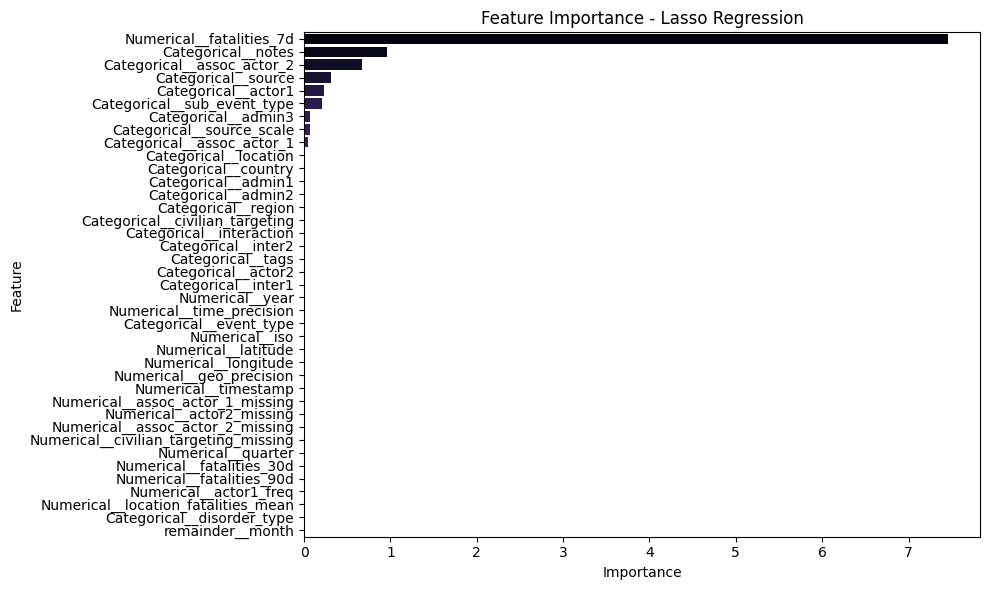

In [ ]:
importances = abs(lasso_model.named_steps['regressor'].coef_)
features = lasso_model.named_steps['preprocessor'].get_feature_names_out()

feature_importance = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='magma')
plt.title('Feature Importance - Lasso Regression')
plt.tight_layout()
plt.show()

# **Random Forest**

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from tabulate import tabulate

In [ ]:
# Create a pipeline with preprocessing and model
rf_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(n_estimators=100, random_state=42))
])

In [ ]:
# Train the model
rf_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/compose/_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Numerical', StandardScaler(),
                                                  ['year', 'time_precision',
                                                   'iso', 'latitude',
                                                   'longitude', 'geo_precision',
                                                   'timestamp',
                                                   'assoc_actor_1_missing',
                                                   'actor2_missing',
                                                   'assoc_actor_2_missing',
                                                   'civilian_targeting_missing',
                                                   'quarter', 'fatalities_7d',
                                                   'fatalities_30d',
                                                   'fatalities_9...
                                                                      'location',
                                                                      'source',
                                                                      'source_scale',
                                                                      'notes',
                                                                      'tags']),
                                                  ['disorder_type',
                                                   'event_type',
                                                   'sub_event_type', 'actor1',
                                                   'assoc_actor_1', 'inter1',
                                                   'actor2', 'assoc_actor_2',
                                                   'inter2', 'interaction',
                                                   'civilian_targeting',
                                                   'region', 'country',
                                                   'admin1', 'admin2', 'admin3',
                                                   'location', 'source',
                                                   'source_scale', 'notes',
                                                   'tags'])])),
                ('model', RandomForestRegressor(random_state=42))])

In [ ]:
# Predict on the test set
y_pred = rf_model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, median_absolute_error # Import median_absolute_error
from tabulate import tabulate  # Import tabulate

# Assuming y_test and y_pred are defined
random_mse = mean_squared_error(y_test, y_pred)
random_rmse = np.sqrt(random_mse) # Changed 'mse' to 'random_mse'
random_mae = mean_absolute_error(y_test, y_pred)
random_r2 = r2_score(y_test, y_pred)
random_medae = median_absolute_error(y_test, y_pred)  # Now median_absolute_error is defined
random_adjusted_r2 = 1 - (1 - random_r2) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1) # Changed 'r2' to 'random_r2'
random_explained_variance = 1 - np.var(y_test - y_pred) / np.var(y_test)

# Create table data
table_data = [
    ["MSE", random_mse],
    ["RMSE", random_rmse],
    ["MAE", random_mae],
    ["R-squared", random_r2],
    ["Adjusted R-squared", random_adjusted_r2],
    ["Median Absolute Error", random_medae],
    ["Explained Variance", random_explained_variance]
]

# Print the formatted table
print(tabulate(table_data, headers=["Metric", "Value"], tablefmt="fancy_grid"))

╒═══════════════════════╤════════════╕
│ Metric                │      Value │
╞═══════════════════════╪════════════╡
│ MSE                   │ 141.092    │
├───────────────────────┼────────────┤
│ RMSE                  │  11.8782   │
├───────────────────────┼────────────┤
│ MAE                   │   2.17736  │
├───────────────────────┼────────────┤
│ R-squared             │   0.77942  │
├───────────────────────┼────────────┤
│ Adjusted R-squared    │   0.779346 │
├───────────────────────┼────────────┤
│ Median Absolute Error │   0.84     │
├───────────────────────┼────────────┤
│ Explained Variance    │   0.779528 │
╘═══════════════════════╧════════════╛


In [ ]:
# Plot: Predicted vs Actual Values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Fatalities')
plt.ylabel('Predicted Fatalities')
plt.grid(True)
plt.show()

# Plot: Residuals
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.7)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Predicted Fatalities')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

This can help check if residuals are normally distributed, which is often an assumption in regression models

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=30, edgecolor='k', alpha=0.7)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

A Q-Q plot can visually assess normality in residuals. Residuals aligning along the 45-degree line indicate normal distribution

In [ ]:
import scipy.stats as stats
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.grid(True)
plt.show()


Instead of just the 45-degree line, adding a regression line can indicate any consistent under- or over-prediction.

In [ ]:
import numpy as np

m, b = np.polyfit(y_test, y_pred, 1)  # Linear regression line
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label="45-degree line")
plt.plot(y_test, m*y_test + b, color='blue', linestyle='-', label="Regression line")
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Fatalities')
plt.ylabel('Predicted Fatalities')
plt.legend()
plt.grid(True)
plt.show()


**Feature importance for Random Regressor**

Random Forest uses a different approach for feature importance. It calculates how much each feature decreases impurity (e.g., Gini impurity) in the trees of the forest. Features that lead to larger impurity reductions are considered more important.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

importances = rf_model.named_steps['model'].feature_importances_
features = numerical_features + categorical_features

# Check the lengths of features and importances
print(f"Length of features: {len(features)}")
print(f"Length of importances: {len(importances)}")

# If the lengths are different, adjust accordingly.
# Here's an example assuming 'importances' has an extra element:
if len(importances) > len(features):
    importances = importances[:len(features)]  # Truncate importances to match features length
elif len(features) > len(importances):
    features = features[:len(importances)]  # Or truncate features to match importances length (less likely)

feature_importance = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='plasma')
plt.title('Feature Importance - Random Forest')
plt.tight_layout()
plt.show()

**A plot of graphical view of the model performance**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have already calculated the evaluation metrics and assigned them to variables:
# For example:
mse_linear = linear_mse  # Calculate MSE for Linear Regression
mse_lasso = lasso_mse  # Calculate MSE for Lasso Regression
mse_rf = random_mse    # Calculate MSE for Random Forest

explained_variance_linear = linear_explained_variance
explained_variance_lasso = lasso_explained_variance
explained_variance_rf = random_explained_variance

rmse_linear = linear_rmse
rmse_lasso = lasso_rmse
rmse_rf = random_rmse

mae_linear = linear_mae
mae_lasso = lasso_mae
mae_rf = random_mae

r2_linear = linear_r2
r2_lasso = lasso_r2
r2_rf = random_r2


medae_linear = random_medae
medae_lasso = random_medae
medae_rf = random_medae

# Store the evaluation metrics for each model
model_names = ['Linear Regression', 'Lasso Regression', 'Random Forest']

# Replace the placeholders below with the actual calculated values
mse_values = [mse_linear, mse_lasso, mse_rf]  # Replace with actual MSE values
rmse_values = [rmse_linear, rmse_lasso, rmse_rf]  # Replace with actual RMSE values
mae_values = [mae_linear, mae_lasso, mae_rf]  # Replace with actual MAE values
r2_values = [r2_linear, r2_lasso, r2_rf]  # Replace with actual R-squared values

medae_values = [medae_linear, medae_lasso, medae_rf]  # Replace with actual R-squared values
explained_variance_values = [explained_variance_linear, explained_variance_lasso, explained_variance_rf]  # Replace with actual Explained Variance values


# Create a bar chart for comparison
bar_width = 0.15
index = np.arange(len(model_names))

plt.figure(figsize=(14, 6))

plt.bar(index, mse_values, bar_width, label='MSE')
plt.bar(index + bar_width, rmse_values, bar_width, label='RMSE')
plt.bar(index + 2 * bar_width, mae_values, bar_width, label='MAE')
plt.bar(index + 3 * bar_width, r2_values, bar_width, label='R-squared')
plt.bar(index + 4 * bar_width, medae_values, bar_width, label='MedAE')  # Added MedAE bar
plt.bar(index + 5 * bar_width, explained_variance_values, bar_width, label='Explained Variance')  # Added Explained Variance bar


plt.xlabel('Models')
plt.ylabel('Metric Value')
plt.title('Model Performance Comparison')
plt.xticks(index + bar_width * 2.5, model_names, rotation=45)  # Center the x-axis labels
plt.legend()
plt.tight_layout()
plt.show()

# **Ridge Regression**

1. Import necessary libraries

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from category_encoders import TargetEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from category_encoders import TargetEncoder
from sklearn.preprocessing import OneHotEncoder

2. Create the Ridge Regression pipeline

In [ ]:
# Define possible transformations for numerical and categorical features
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

In [ ]:
#ridge_model = Pipeline(steps=[
#    ('preprocessor', preprocessor),  # Your existing preprocessor
#    ('regressor', Ridge(alpha=1.0))  # Ridge model with regularization parameter alpha
#])

# Create pipeline with placeholders for hyperparameters
ridge_pipeline = Pipeline(steps=[
    ('preprocessor', ColumnTransformer(transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', TargetEncoder(cols=categorical_features), categorical_features)
    ])),
    ('regressor', Ridge())
])

In [ ]:
# Define parameter grid
param_grid = {
    'regressor__alpha': [0.1, 1, 10],
    'regressor__fit_intercept': [True],
    'regressor__solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg']
}

3. Train the model

In [ ]:
# Set up GridSearchCV
grid_search = GridSearchCV(estimator=ridge_pipeline, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['year',
                                                                          'time_precision',
                                                                          'iso',
                                                                          'latitude',
                                                                          'longitude',
                                                                          'geo_precision',
                                                                          'timestamp',
                                                                          'assoc_actor_1_missing',
                                                                          'actor2_missing',
                                                                          'assoc_actor_2_missing',
                                                                          'civilian_targeting_missing',
                                                                          'quarter',
                                                                          'fatalities_7d',
                                                                          'fatalities_30d',
                                                                          'fatalities_90d...
                                                                          'inter2',
                                                                          'interaction',
                                                                          'civilian_targeting',
                                                                          'region',
                                                                          'country',
                                                                          'admin1',
                                                                          'admin2',
                                                                          'admin3',
                                                                          'location',
                                                                          'source',
                                                                          'source_scale',
                                                                          'notes',
                                                                          'tags'])])),
                                       ('regressor', Ridge())]),
             n_jobs=-1,
             param_grid={'regressor__alpha': [0.1, 1, 10],
                         'regressor__fit_intercept': [True],
                         'regressor__solver': ['auto', 'svd', 'cholesky',
                                               'lsqr', 'sparse_cg']},
             scoring='neg_mean_squared_error')

Display best parameters and results

In [ ]:
print("Best parameters:", grid_search.best_params_)
print("Best MSE:", -grid_search.best_score_)

Best parameters: {'regressor__alpha': 0.1, 'regressor__fit_intercept': True, 'regressor__solver': 'lsqr'}
Best MSE: 169.33362899612808


4. Make predictions

In [ ]:
# Predictions using the best model
y_pred_ridge = grid_search.predict(X_test)
mse = mean_squared_error(y_test, y_pred_ridge)
print("Test MSE:", mse)

Test MSE: 118.45566997945794


5. Evaluate the model

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, median_absolute_error
from tabulate import tabulate
import numpy as np

# Assuming y_test and y_pred_ridge are defined
ridge_mse = mean_squared_error(y_test, y_pred_ridge)
ridge_rmse = np.sqrt(ridge_mse)
ridge_mae = mean_absolute_error(y_test, y_pred_ridge)
ridge_r2 = r2_score(y_test, y_pred_ridge)

#Handle potential issues with zero or negative values in y_test for MAPE calculation
# Replace zero and negative values with a small positive value, e.g., 1e-10
y_test_mape = y_test.copy()  # Create a copy to avoid modifying the original y_test
y_test_mape[y_test_mape <= 0] = 1e-10

ridge_medae = median_absolute_error(y_test, y_pred_ridge)
ridge_adjusted_r2 = 1 - (1 - ridge_r2) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)
ridge_explained_variance = 1 - np.var(y_test - y_pred_ridge) / np.var(y_test)

# Create table data
table_data = [
    ["MSE", ridge_mse],
    ["RMSE", ridge_rmse],
    ["MAE", ridge_mae],
    ["R-squared", ridge_r2],
    ["Adjusted R-squared", ridge_adjusted_r2],
    ["Median Absolute Error", ridge_medae],
    ["Explained Variance", ridge_explained_variance]
]

# Print the formatted table
print(tabulate(table_data, headers=["Metric", "Value"], tablefmt="fancy_grid"))

╒═══════════════════════╤════════════╕
│ Metric                │      Value │
╞═══════════════════════╪════════════╡
│ MSE                   │ 118.456    │
├───────────────────────┼────────────┤
│ RMSE                  │  10.8837   │
├───────────────────────┼────────────┤
│ MAE                   │   2.67612  │
├───────────────────────┼────────────┤
│ R-squared             │   0.815899 │
├───────────────────────┼────────────┤
│ Adjusted R-squared    │   0.815807 │
├───────────────────────┼────────────┤
│ Median Absolute Error │   1.12118  │
├───────────────────────┼────────────┤
│ Explained Variance    │   0.81593  │
╘═══════════════════════╧════════════╛


<ipython-input-28-ae21ea8e17f7>:14: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1e-10' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  y_test_mape[y_test_mape <= 0] = 1e-10


Feature importance Bayesian Regressor

<ipython-input-29-f6c9d49dfd69>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='inferno')


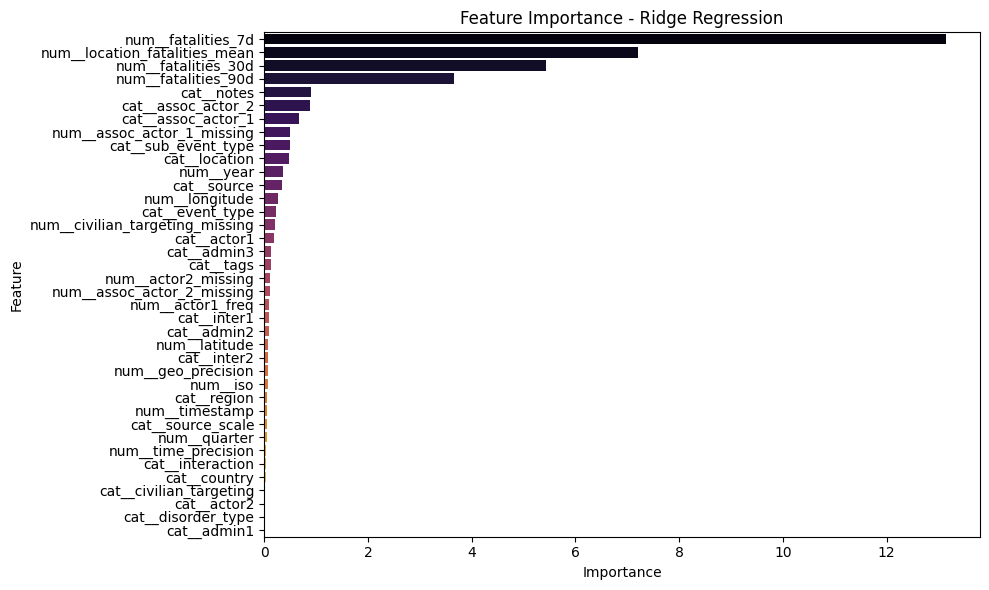

In [ ]:
importances = abs(grid_search.best_estimator_.named_steps['regressor'].coef_) # Use grid_search.best_estimator_ instead of ridge_model
features = grid_search.best_estimator_.named_steps['preprocessor'].get_feature_names_out() # Use grid_search.best_estimator_ instead of ridge_model

feature_importance = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='inferno')
plt.title('Feature Importance - Ridge Regression')
plt.tight_layout()
plt.show()

# **Ridge Model Validation**

Evaluate and tune on the validation data

In [ ]:
y_pred_val = grid_search.predict(X_val)
mse_val = mean_squared_error(y_val, y_pred_val)
r2_val = r2_score(y_val, y_pred_val)

print(f"Validation MSE: {mse_val}")
print(f"Validation R-squared: {r2_val}")

# Tune hyperparameters based on validation performance (e.g., using GridSearchCV)
# ... (Code for hyperparameter tuning) ...

# Retrain the best model on the combined training and validation data
grid_search.fit(X_train_val, y_train_val)

Validation MSE: 141.81022691212544
Validation R-squared: 0.7180374952523918


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['year',
                                                                          'time_precision',
                                                                          'iso',
                                                                          'latitude',
                                                                          'longitude',
                                                                          'geo_precision',
                                                                          'timestamp',
                                                                          'assoc_actor_1_missing',
                                                                          'actor2_missing',
                                                                          'assoc_actor_2_missing',
                                                                          'civilian_targeting_missing',
                                                                          'quarter',
                                                                          'fatalities_7d',
                                                                          'fatalities_30d',
                                                                          'fatalities_90d...
                                                                          'inter2',
                                                                          'interaction',
                                                                          'civilian_targeting',
                                                                          'region',
                                                                          'country',
                                                                          'admin1',
                                                                          'admin2',
                                                                          'admin3',
                                                                          'location',
                                                                          'source',
                                                                          'source_scale',
                                                                          'notes',
                                                                          'tags'])])),
                                       ('regressor', Ridge())]),
             n_jobs=-1,
             param_grid={'regressor__alpha': [0.1, 1, 10],
                         'regressor__fit_intercept': [True],
                         'regressor__solver': ['auto', 'svd', 'cholesky',
                                               'lsqr', 'sparse_cg']},
             scoring='neg_mean_squared_error')

Final evaluation on the testing data (only once)

In [ ]:
y_pred_test = grid_search.predict(X_test)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

print(f"Test MSE: {mse_test}")
print(f"Test R-squared: {r2_test}")

Test MSE: 117.15869767506713
Test R-squared: 0.8179147582505646


# **Gradient Boosting Regression**

1. Import the necessary library

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

2. Gradient Boosting Regression pipeline

In [ ]:
gb_model = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Your existing preprocessor
    ('regressor', GradientBoostingRegressor(random_state=42))  # Gradient Boosting model
])

3. Train the model

In [ ]:
gb_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/compose/_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Numerical', StandardScaler(),
                                                  ['year', 'time_precision',
                                                   'iso', 'latitude',
                                                   'longitude', 'geo_precision',
                                                   'timestamp',
                                                   'assoc_actor_1_missing',
                                                   'actor2_missing',
                                                   'assoc_actor_2_missing',
                                                   'civilian_targeting_missing',
                                                   'quarter', 'fatalities_7d',
                                                   'fatalities_30d',
                                                   'fatalities_9...
                                                                      'source',
                                                                      'source_scale',
                                                                      'notes',
                                                                      'tags']),
                                                  ['disorder_type',
                                                   'event_type',
                                                   'sub_event_type', 'actor1',
                                                   'assoc_actor_1', 'inter1',
                                                   'actor2', 'assoc_actor_2',
                                                   'inter2', 'interaction',
                                                   'civilian_targeting',
                                                   'region', 'country',
                                                   'admin1', 'admin2', 'admin3',
                                                   'location', 'source',
                                                   'source_scale', 'notes',
                                                   'tags'])])),
                ('regressor', GradientBoostingRegressor(random_state=42))])

4. Make predictions:

In [ ]:
y_pred_gb = gb_model.predict(X_test)

5. Evaluate the model

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, median_absolute_error
from tabulate import tabulate
import numpy as np

# Assuming y_test and y_pred_gb are defined
gb_mse = mean_squared_error(y_test, y_pred_gb)
gb_rmse = np.sqrt(gb_mse)
gb_mae = mean_absolute_error(y_test, y_pred_gb)
gb_r2 = r2_score(y_test, y_pred_gb)

#Handle potential issues with zero or negative values in y_test for MAPE calculation
# Replace zero and negative values with a small positive value, e.g., 1e-10
y_test_mape = y_test.copy()  # Create a copy to avoid modifying the original y_test
y_test_mape[y_test_mape <= 0] = 1e-10


gb_msle = mean_squared_error(np.log1p(y_test_msle), np.log1p(y_pred_msle))

gb_medae = median_absolute_error(y_test, y_pred_gb)
gb_adjusted_r2 = 1 - (1 - gb_r2) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)
gb_explained_variance = 1 - np.var(y_test - y_pred_gb) / np.var(y_test)

# Create table data
table_data = [
    ["MSE", gb_mse],
    ["RMSE", gb_rmse],
    ["MAE", gb_mae],
    ["R-squared", gb_r2],
    ["Adjusted R-squared", gb_adjusted_r2],
    ["Median Absolute Error", gb_medae],
    ["Explained Variance", gb_explained_variance]
]

# Print the formatted table
print(tabulate(table_data, headers=["Metric", "Value"], tablefmt="fancy_grid"))

╒═══════════════════════╤════════════╕
│ Metric                │      Value │
╞═══════════════════════╪════════════╡
│ MSE                   │ 147.589    │
├───────────────────────┼────────────┤
│ RMSE                  │  12.1486   │
├───────────────────────┼────────────┤
│ MAE                   │   2.78621  │
├───────────────────────┼────────────┤
│ R-squared             │   0.769262 │
├───────────────────────┼────────────┤
│ Adjusted R-squared    │   0.769185 │
├───────────────────────┼────────────┤
│ Median Absolute Error │   1.68413  │
├───────────────────────┼────────────┤
│ Explained Variance    │   0.76933  │
╘═══════════════════════╧════════════╛


<ipython-input-62-3149fa42b78f>:14: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1e-10' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  y_test_mape[y_test_mape <= 0] = 1e-10


Feature importance for the Gradient Boosting Regressor

In [ ]:
importances = gb_model.named_steps['regressor'].feature_importances_
features = gb_model.named_steps['preprocessor'].get_feature_names_out()

feature_importance = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='cividis')
plt.title('Feature Importance - Gradient Boosting')
plt.tight_layout()
plt.show()

# **xgboost regression**

1. Install XGBoost

In [ ]:
!pip install xgboost==1.7.5

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.3/200.3 MB 4.4 MB/s eta 0:00:00
  Attempting uninstall: xgboost
    Found existing installation: xgboost 2.1.2
    Uninstalling xgboost-2.1.2:
      Successfully uninstalled xgboost-2.1.2


2. Import the necessary library

In [ ]:
import xgboost as xgb

3. XGBoost Regression pipeline

In [ ]:
xgb_model = Pipeline(steps=[
    ('preprocessor', preprocessor),  # existing preprocessor
    ('regressor', xgb.XGBRegressor(random_state=42))  # XGBoost model
])

4. Train the model

In [ ]:
xgb_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/compose/_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Numerical', StandardScaler(),
                                                  ['year', 'time_precision',
                                                   'iso', 'latitude',
                                                   'longitude', 'geo_precision',
                                                   'timestamp',
                                                   'assoc_actor_1_missing',
                                                   'actor2_missing',
                                                   'assoc_actor_2_missing',
                                                   'civilian_targeting_missing',
                                                   'quarter', 'fatalities_7d',
                                                   'fatalities_30d',
                                                   'fatalities_9...
                              feature_types=None, gamma=None, gpu_id=None,
                              grow_policy=None, importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, n_estimators=100,
                              n_jobs=None, num_parallel_tree=None,
                              predictor=None, random_state=42, ...))])

5. Make predictions

In [ ]:
y_pred_xgb = xgb_model.predict(X_test)

6. Evaluate the model

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, median_absolute_error
from tabulate import tabulate
import numpy as np

# Assuming y_test and y_pred_xgb are defined
xgb_mse = mean_squared_error(y_test, y_pred_xgb)
xgb_rmse = np.sqrt(xgb_mse)
xgb_mae = mean_absolute_error(y_test, y_pred_xgb)
xgb_r2 = r2_score(y_test, y_pred_xgb)


xgb_medae = median_absolute_error(y_test, y_pred_xgb)
xgb_adjusted_r2 = 1 - (1 - xgb_r2) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)
xgb_explained_variance = 1 - np.var(y_test - y_pred_xgb) / np.var(y_test)

# Create table data
table_data = [
    ["MSE", xgb_mse],
    ["RMSE", xgb_rmse],
    ["MAE", xgb_mae],
    ["R-squared", xgb_r2],
    ["Adjusted R-squared", xgb_adjusted_r2],
    ["Median Absolute Error", xgb_medae],
    ["Explained Variance", xgb_explained_variance]
]

# Print the formatted table
print(tabulate(table_data, headers=["Metric", "Value"], tablefmt="fancy_grid"))

╒═══════════════════════╤════════════╕
│ Metric                │      Value │
╞═══════════════════════╪════════════╡
│ MSE                   │ 145.805    │
├───────────────────────┼────────────┤
│ RMSE                  │  12.075    │
├───────────────────────┼────────────┤
│ MAE                   │   2.15438  │
├───────────────────────┼────────────┤
│ R-squared             │   0.772052 │
├───────────────────────┼────────────┤
│ Adjusted R-squared    │   0.771976 │
├───────────────────────┼────────────┤
│ Median Absolute Error │   0.665357 │
├───────────────────────┼────────────┤
│ Explained Variance    │   0.772297 │
╘═══════════════════════╧════════════╛


Feature importance for XGBoot Regressor

In [ ]:
importances = xgb_model.named_steps['regressor'].feature_importances_
features = xgb_model.named_steps['preprocessor'].get_feature_names_out()

feature_importance = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='viridis') # or any other palette
plt.title('Feature Importance - XGBoost')
plt.tight_layout()
plt.show()

# **Support Vector Machine Regression (SVR)**

1. Import the necessary library

In [ ]:
from sklearn.svm import SVR

2. SVR pipeline

In [ ]:
svr_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', SVR(kernel='linear'))
])

3. Train the model

In [ ]:
# Sample a smaller portion of the training data
X_train_subset = X_train.sample(frac=0.08, random_state=42)  # Use a smaller fraction if needed
y_train_subset = y_train[X_train_subset.index]

# Fit the model on the subset
svr_model.fit(X_train_subset, y_train_subset)

/usr/local/lib/python3.10/dist-packages/sklearn/compose/_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Numerical', StandardScaler(),
                                                  ['year', 'time_precision',
                                                   'iso', 'latitude',
                                                   'longitude', 'geo_precision',
                                                   'timestamp',
                                                   'assoc_actor_1_missing',
                                                   'actor2_missing',
                                                   'assoc_actor_2_missing',
                                                   'civilian_targeting_missing',
                                                   'quarter', 'fatalities_7d',
                                                   'fatalities_30d',
                                                   'fatalities_9...
                                                                      'admin2',
                                                                      'admin3',
                                                                      'location',
                                                                      'source',
                                                                      'source_scale',
                                                                      'notes',
                                                                      'tags']),
                                                  ['disorder_type',
                                                   'event_type',
                                                   'sub_event_type', 'actor1',
                                                   'assoc_actor_1', 'inter1',
                                                   'actor2', 'assoc_actor_2',
                                                   'inter2', 'interaction',
                                                   'civilian_targeting',
                                                   'region', 'country',
                                                   'admin1', 'admin2', 'admin3',
                                                   'location', 'source',
                                                   'source_scale', 'notes',
                                                   'tags'])])),
                ('regressor', SVR(kernel='linear'))])

4. Make predictions

In [ ]:
y_pred_svr = svr_model.predict(X_test)

5. Evaluate the model

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, median_absolute_error
from tabulate import tabulate
import numpy as np

# Assuming y_test and y_pred_svr are defined
svr_mse = mean_squared_error(y_test, y_pred_svr)
svr_rmse = np.sqrt(svr_mse)
svr_mae = mean_absolute_error(y_test, y_pred_svr)
svr_r2 = r2_score(y_test, y_pred_svr)


svr_medae = median_absolute_error(y_test, y_pred_svr)
svr_adjusted_r2 = 1 - (1 - svr_r2) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)
svr_explained_variance = 1 - np.var(y_test - y_pred_svr) / np.var(y_test)

# Create table data
table_data = [
    ["MSE", svr_mse],
    ["RMSE", svr_rmse],
    ["MAE", svr_mae],
    ["R-squared", svr_r2],
    ["Adjusted R-squared", svr_adjusted_r2],
    ["Median Absolute Error", svr_medae],
    ["Explained Variance", svr_explained_variance]
]

# Print the formatted table
print(tabulate(table_data, headers=["Metric", "Value"], tablefmt="fancy_grid"))

NameError: name 'y_test' is not defined

Feature Importance Analysis for SVR

Unlike tree-based models like Random Forest or XGBoost, SVR doesn't have a built-in feature importance attribute. However, we can use techniques like Permutation Feature Importance to estimate the importance of features in an SVR model.

In [ ]:
from sklearn.inspection import permutation_importance

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


# Calculate permutation importance
result = permutation_importance(svr_model, X_test_transformed, y_test, n_repeats=10, random_state=42, scoring='neg_mean_squared_error')

# Create DataFrame for visualization
importance = result.importances_mean
features = numerical_features + categorical_features  # Your list of feature names

feature_importance = pd.DataFrame({'Feature': features, 'Importance': importance})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Create horizontal bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='viridis')  # Customize the palette if you like
plt.title('Feature Importance - SVR (Permutation Importance)')
plt.tight_layout()
plt.show()

NameError: name 'svr_model' is not defined

# **Model Explainability**

## **SHAP**

1. Install SHAP

In [ ]:
!pip install shap==0.42.1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.9/547.9 kB 8.2 MB/s eta 0:00:00
  Attempting uninstall: slicer
    Found existing installation: slicer 0.0.8
    Uninstalling slicer-0.0.8:
      Successfully uninstalled slicer-0.0.8
  Attempting uninstall: shap
    Found existing installation: shap 0.46.0
    Uninstalling shap-0.46.0:
      Successfully uninstalled shap-0.46.0


2. Import SHAP and other necessary libraries

In [ ]:
import shap
import matplotlib.pyplot as plt

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


In [ ]:
# Get the preprocessor from the pipeline
preprocessor = grid_search.best_estimator_.named_steps['preprocessor']

# Preprocess the test data
X_test_transformed = preprocessor.transform(X_test)

3. Create the explainer

In [ ]:
# Create the explainer with the preprocessed training data
explainer = shap.Explainer(grid_search.best_estimator_.named_steps['regressor'],
                          preprocessor.transform(X_train))

4. Calculate SHAP values

In [ ]:
# Calculate SHAP values for the preprocessed test data
shap_values = explainer(X_test_transformed)

5. Visualize SHAP values

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


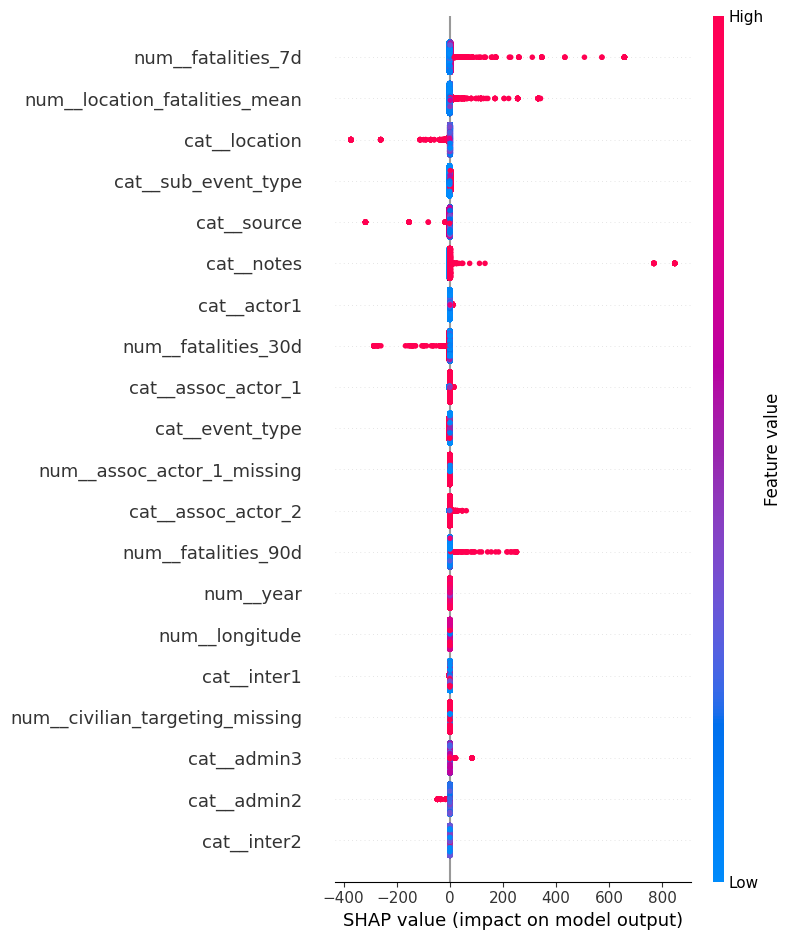

In [ ]:
# Generate the summary plot using the preprocessed test data and feature names
shap.summary_plot(shap_values, X_test_transformed, feature_names=features)

Force plot (for individual predictions)

# **RESIDUAL VALUES**

In [ ]:
shap.force_plot(explainer.expected_value, shap_values[0,:], X_test.iloc[0,:], feature_names=features)